<center>
    
# Beyond the Fog: An Analysis of San Francisco Crime
## By Matthew Tu | 2025

</center>

---

#### This data is taken directly from the official San Francisco Government Database.
##### To put this file to scale, from 2018 to 2/10/2025, there are **currently 930648 rows**.

https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783/about_data

---
## Summary
<div style=margin:20px>
Growing up in San Francisco, California, I often heard about fluctuations in crime. Particularly in recent years as car break-ins, assaults, robberies, and shoplifting have become increasingly prevalent. This project aims to leverage real crime databases to visualize and analyze the prevalence of crimes over time. By identifying patterns and trends, this analysis provides valuable insights into how crime evolves across different periods. The ultimate goal is to empower local policymakers with data-driven insights, enabling them to craft more effective policies that address the root causes of these issues and promote safer communities.
</div>

---
## Methodology
<div style=margin:20px>
    
#### Data Preparation
The dataset was sourced from official police records, containing information such as crime type, date, and subcategories. Key preprocessing steps included:
- Converting `Incident Date` to a datetime format for filtering and aggregation.
- Filtering data by **crime type**, **subcrime type**, and/or **year** as needed for specific analyses.

#### Visualization Techniques
<div style=margin:20px>
    
##### **Histogram of Crime Occurrences**
- Displays the frequency of different crime types.
- Crimes with fewer than 150 occurrences were excluded for clarity.
- Bars were colored using a gradient from red to blue, and crimes with over 1,000 occurrences were labeled directly above the bars (rotated 45° for readability).

##### **Comparative Bar Chart**
- Visualizes the top 5 crimes for each year as grouped bars.
- Each group represents a year, with individual bars for the top 5 crimes.
- Crime type labels were rotated 45°, and bars were bordered with black for better distinction.

##### **Time-Based Crime Visualization**
- Aggregates crime data by date and applies:
  - **Rolling Average**: Smooths trends with a 7-day window (for specific years) or a 30-day window (for all years).
  - **Polynomial Fit**: Uses a 5th-degree polynomial for specific years and a 12th-degree polynomial for all years to model trends.
- Highlights the **Covid lockdown (March 17, 2020)** with a vertical line and the top 3 crime occurrence dates with markers and labels.

##### **Subcrime Analysis**
- Applies the same methodology to subcategories of crimes, producing separate visualizations to compare main crime types and subcategories.
</div>

#### Tools and Libraries
- **Pandas**: For data manipulation and filtering.
- **Matplotlib**: For creating detailed and customized visualizations.
- **NumPy**: For numerical operations like rolling averages and polynomial fits.

#### Adaptability
- **Year-Specific Analysis**: Focuses on trends within a single year.
- **All-Year Analysis**: Provides a broader perspective of crime trends over time.
- **Subcrime Comparisons**: Offers detailed insights into specific subcategories alongside main crime types.

#### Key Visual Features
- **Conditional Titles**: Reflect the selected crime type, subcrime, and year.
- **Annotations**: Mark significant dates (e.g., Covid lockdown) and top crime days.
- **Consistent Formatting**: Ensures clarity and readability across all visualizations.
</div>
___
## Code and Results

In [2]:
filePath = "/Users/matt/Documents/MT Data Projects/SF data/Police_Department_Incident_Reports__2018_to_Present_20250210.csv"

In [3]:
def listUniqueItemsAsTable(filePath):
    import pandas as pd
    
    # Read the CSV file from the given file path into a DataFrame
    # DataFrames are like spreadsheet tables in memory
    data = pd.read_csv(filePath)
    
    # Check if the required columns are present in the DataFrame
    # If these columns are missing, it's impossible to list their unique values
    if "Incident Category" not in data.columns or "Incident Subcategory" not in data.columns:
        print("The required columns ('Incident Category' or 'Incident Subcategory') are missing in the dataset.")
        return
    
    # Extract unique values from the 'Incident Category' and 'Incident Subcategory' columns
    # dropna() removes any NaN (missing) entries before finding unique values
    # sorted() arranges them in alphabetical order
    uniqueCategories = sorted(data['Incident Category'].dropna().unique())
    uniqueSubcategories = sorted(data['Incident Subcategory'].dropna().unique())
    
    # Determine the maximum length between the two lists of unique items
    # This helps in constructing a table with two columns of equal length
    maxLength = max(len(uniqueCategories), len(uniqueSubcategories))
    
    # Pad the shorter list with empty strings so that both lists are the same length
    # This ensures the table rows align correctly when creating the DataFrame
    categoriesPadded = list(uniqueCategories) + [""] * (maxLength - len(uniqueCategories))
    subcategoriesPadded = list(uniqueSubcategories) + [""] * (maxLength - len(uniqueSubcategories))
    
    # Combine the padded lists into a new DataFrame
    # Each row will contain one category and one subcategory
    uniqueTable = pd.DataFrame({
        "Unique Incident Categories": categoriesPadded,
        "Unique Incident Subcategories": subcategoriesPadded
    })
    
    # Print a header, then display the table as Markdown for readability
    print("Table Of Crimes and Subcategories:")
    print(uniqueTable.to_markdown(index=False))
    print(f"Total amount of Categories and Subcategories: {len(uniqueCategories)+len(uniqueSubcategories)}")

listUniqueItemsAsTable(filePath)

Table Of Crimes and Subcategories:
| Unique Incident Categories                   | Unique Incident Subcategories            |
|:---------------------------------------------|:-----------------------------------------|
| Arson                                        | Aggravated Assault                       |
| Assault                                      | Arrest                                   |
| Burglary                                     | Arson                                    |
| Case Closure                                 | Bad Checks                               |
| Civil Sidewalks                              | Bribery                                  |
| Courtesy Report                              | Burglary - Commercial                    |
| Disorderly Conduct                           | Burglary - Hot Prowl                     |
| Drug Offense                                 | Burglary - Other                         |
| Drug Violation                             

### `plotCrimeHistogram(filePath, year=None)`

#### Description
This function generates a histogram to visualize crime occurrences. Allowing users to focus on specific years or analyze the entire dataset. Crimes with **fewer than 150 occurrences are excluded** for clarity, and crimes with **more than 1,000 occurrences are labeled** on the chart.

#### Parameters
- `filePath` (str): Path to the CSV file containing the crime data.
- `year` (int) (**Optional**): Use to specify a year to analyze. **If not specified**, the function analyzes all years in the given dataset.

#### Key Features
1. **Year Filtering**: Filters data by the specified year or includes all years if `year` is not provided.
2. **Occurrence Threshold**: Excludes crimes with fewer than 150 occurrences.
3. **Gradient Bars**: Bars transition from red (leftmost) to blue (rightmost) using a gradient.
4. **Labeling**: Crimes with more than 1,000 occurrences are labeled above the bars, with labels angled at 45 degrees for better readability.

#### Example Usage
```python
# Analyze crime occurrences for all years
plotCrimeHistogram(filePath)

# Analyze crime occurrences for a specific year (e.g., 2020)
plotCrimeHistogram(filePath="crime_data.csv", year=2020)


In [65]:
def plotCrimeHistogram(filePath, year=None):
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib.colors import LinearSegmentedColormap

    # Read data
    data = pd.read_csv(filePath)
    data['Incident Date'] = pd.to_datetime(data['Incident Date'])  # Ensure dates are in datetime format

    # Convert the 'Incident Date' column to datetime objects so we can filter by year if specified
    if year:
        data = data[data['Incident Date'].dt.year == year]
        yearLabel = f"Year: {year}"
    else:
        yearLabel = "All Years"

    # Group data by crime type and count occurrences
    # The result is a Series indexed by crime type, with occurrence counts as values
    crimeCounts = data['Incident Category'].value_counts()

    # Filter out crimes with less than 150 occurrences
    filteredCrimeCounts = crimeCounts[crimeCounts >= 150]

    # Create a gradient color map from red to blue
    gradient = LinearSegmentedColormap.from_list("RedBlueGradient", ["red", "blue"])
    colors = gradient(np.linspace(0, 1, len(filteredCrimeCounts)))

    # Create the histogram
    fig, ax = plt.subplots(figsize=(15, 8))
    bars = ax.bar(
        filteredCrimeCounts.index,
        filteredCrimeCounts.values,
        color=colors,
        edgecolor="black",
    )

    # Label crimes with more than 1,000 occurrences, angled at 45 degrees
    for xVal, value in enumerate(filteredCrimeCounts):
        if value > 1000:
            # Rotate the occurrence labels above the bars
            plt.text(
                xVal,
                value + 50,
                f"{value}",
                ha="left",
                va="bottom",
                fontsize=10,
                color="red",
                rotation=45,
            )

    # Plot formatting
    plt.title(f"Histogram of Crime Occurrences ({yearLabel})", size=20)
    plt.xlabel("Crime Type", size=15)
    plt.ylabel("Number of Occurrences", size=15)
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


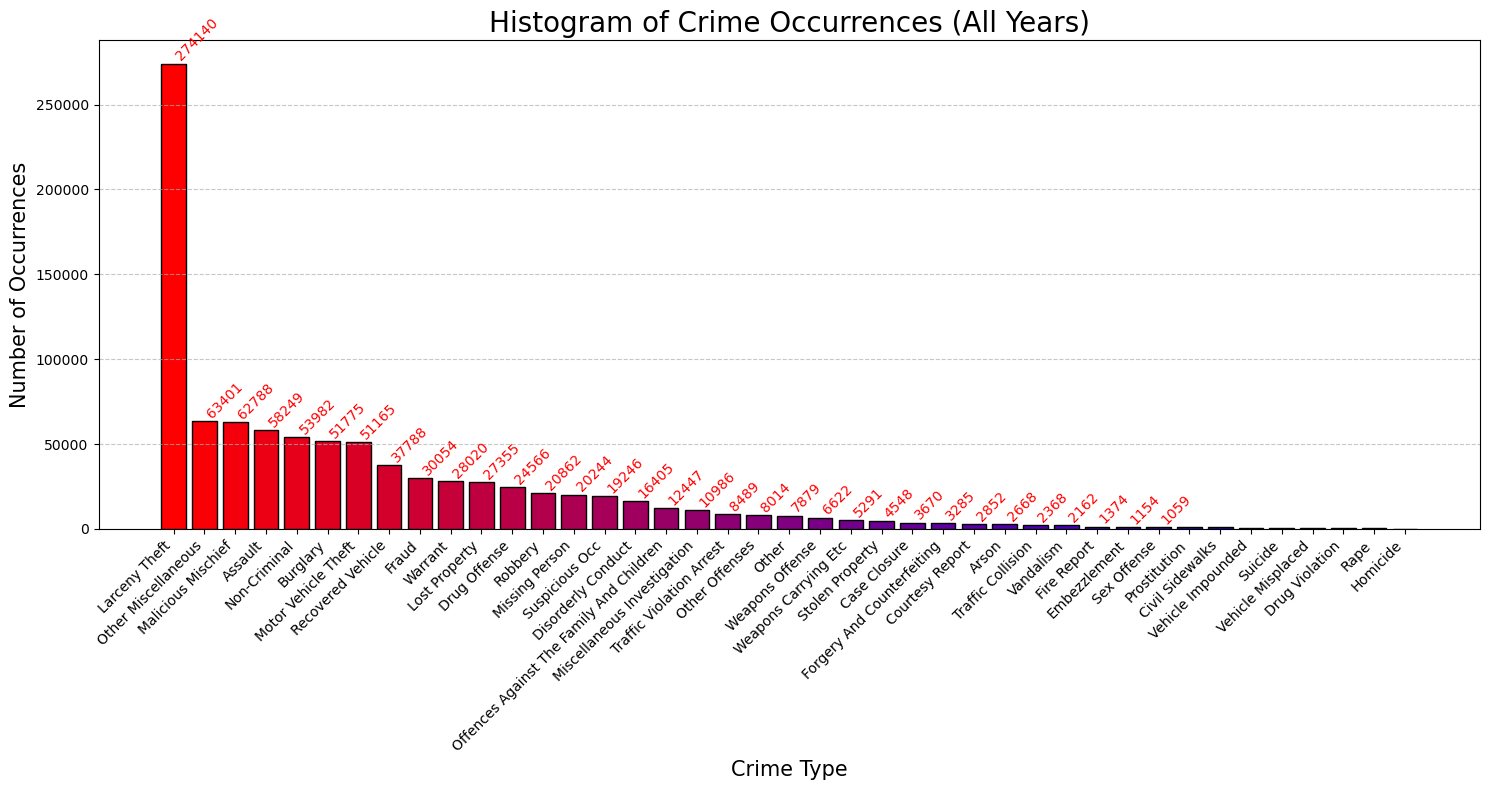

In [66]:
plotCrimeHistogram(filePath)

---
### `comparativeCrimeBarChart(filePath, years=None)`

#### Description
This function generates a **comparative bar chart** to visualize the **top 5 crimes** for multiple years. Each year is represented by a group of 5 bars, where the heights indicate the number of occurrences for the most frequent crime types in that year. The function allows for analyzing specific years or all available years in the dataset.

#### Parameters
- `filePath` (str): Path to the CSV file containing the crime data.
- `years` (list of int) **optional**: A list of specific years to analyze. If not provided, the function includes all years in the dataset.

#### Key Features
1. **Year Filtering**:
   - Analyze specific years if provided.
   - Default to analyzing all years if no `years` parameter is passed.

2. **Top 5 Crimes**:
   - Identifies the top 5 crimes for each year based on the number of occurrences.
   - Dynamically adjusts the bar chart to include these top crimes.

3. **Grouped Bar Chart**:
   - Each year is represented by a group of 5 bars.
   - Bars are color-coded and spaced dynamically to ensure clear visual separation.

4. **Labels and Annotations**:
   - Crime types are labeled above each bar with a 45-degree rotation for readability.
   - Bars are bordered with black edges for better distinction.

5. **Polished Visualization**:
   - Automatically adjusts layout, titles, axis labels, and gridlines for clarity.
   - Includes a legend to differentiate between years.

#### Example Usage
```python
# Compare the top 5 crimes for specific years
comparativeCrimeBarChart(filePath="crime_data.csv", years=[2019, 2020, 2021])

# Compare the top 5 crimes for all years
comparativeCrimeBarChart(filePath="crime_data.csv")


In [68]:
def comparativeCrimeBarChart(filePath, years=None):
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np

    # Read data
    data = pd.read_csv(filePath)

    # Convert the 'Incident Date' column to datetime objects. Allowing us to extract the 'Year' and filter by it
    data['Incident Date'] = pd.to_datetime(data['Incident Date'])  # Ensure dates are in datetime format
    data['Year'] = data['Incident Date'].dt.year  # Extract year from date

    # Filter data for the specified years (or use all years if not specified)
    if years:
        data = data[data['Year'].isin(years)]
    else:
        years = sorted(data['Year'].unique())  # Use all available years

    # For each year, determine the top 5 most frequent crimes
    topCrimesByYear = {}
    for year in years:
        # Select the subset of rows for the current year
        yearlyData = data[data['Year'] == year]
        # Count how many times each crime category appears
        crimeCounts = yearlyData['Incident Category'].value_counts()
        topCrimes = crimeCounts.head(5)  # Get the top 5 crimes
        topCrimesByYear[year] = topCrimes # Store Top 5

    # Create the bar chart
    fig, ax = plt.subplots(figsize=(15, 8))

    # Define bar width and calculate positions for each year
    barWidth = 0.15
    barPositions = np.arange(len(years))  # Center positions for each year group

    # Loop through the list of years to plot each year's top crimes
    for i, year in enumerate(years):
        # Get top crimes for the year and their counts
        topCrimes = topCrimesByYear.get(year, pd.Series())
        # Separate the crime labels (index) and counts (values)
        crimeLabels = topCrimes.index
        counts = topCrimes.values

        # Calculate the x-positions for bars within this year's group
        positions = barPositions[i] + np.linspace(-2 * barWidth, 2 * barWidth, len(counts))

        # Plot bars for this year
        bars = ax.bar(positions, counts, barWidth, label=f'{year}', alpha=0.8, edgecolor='black')

        # Label crimes with counts and rotate labels 45 degrees
        for pos, count, label in zip(positions, counts, crimeLabels):
            ax.text(pos, count + 50, label, ha='left', va='bottom', fontsize=9, rotation=45)

    # Formatting
    ax.set_title("Top 5 Crimes Based on Occurences, By Year", size=20)
    ax.set_xlabel("Year", fontsize=20)
    ax.set_ylabel("Number of Occurrences", fontsize=20)
    ax.set_xticks(barPositions)
    ax.set_xticklabels(years, fontsize=18)
    ax.legend(title="Years", fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.8)
    plt.tight_layout()
    plt.show()


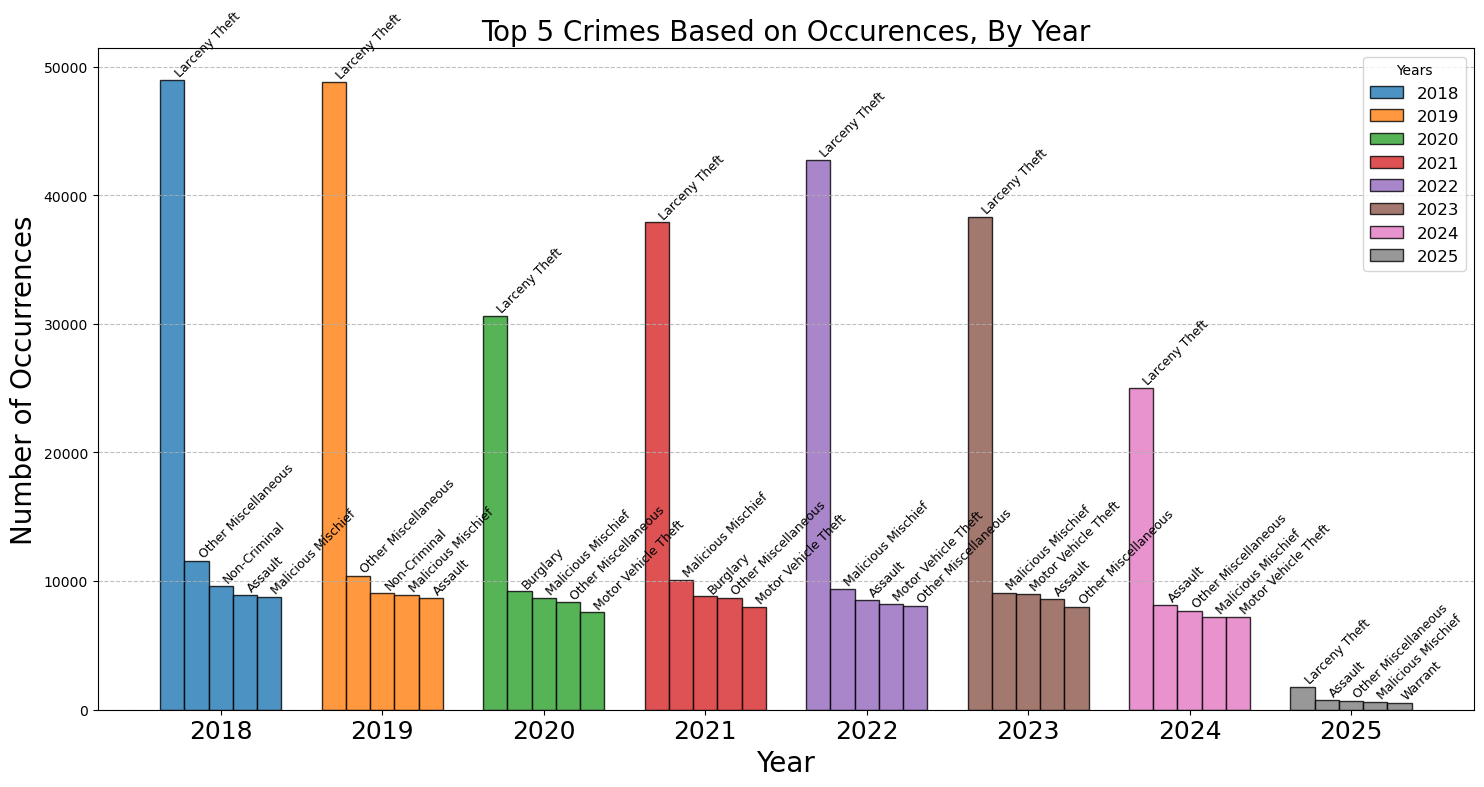

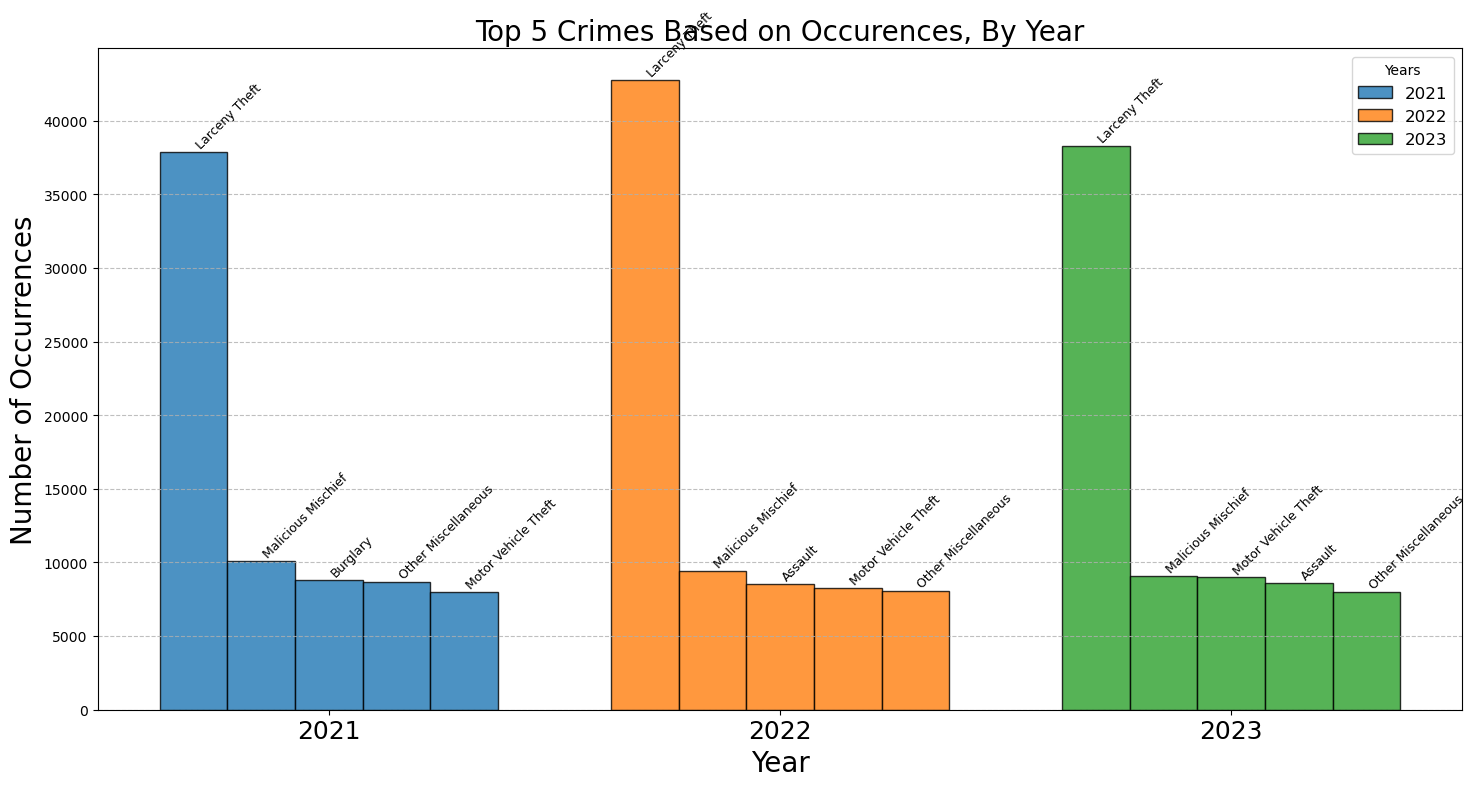

In [69]:
comparativeCrimeBarChart(filePath)
comparativeCrimeBarChart(filePath, years=[2021, 2022, 2023])

---
### `analyzeCrimeSubcategories(filePath, crimeType)`
<div style = margin:20px>
    
This function visualizes the yearly totals of a specified crime category and its subcategories using a grouped bar chart.

#### **Parameters**
- `filePath` (str): Path to the CSV file containing crime data.
- `crimeType` (str): The primary crime category to analyze (e.g., "Theft").

#### **Description**
1. **Data Preparation**:
   - Reads the CSV file and ensures the `Incident Date` is in datetime format.
   - Filters the data for the specified `crimeType` and identifies all unique subcategories.
   - Groups the data by year and subcategory to calculate yearly totals.

2. **Data Organization**:
   - Dynamically sorts subcategories in descending order for each year.
   - Ensures consistent alignment of bars across all years for clarity.

3. **Visualization**:
   - Creates a grouped bar chart where:
     - Each group represents a year.
     - Each bar within a group represents a subcategory.
   - Bars are colored uniquely for each subcategory.
   - Labels on the bars display the total occurrences, centered and rotated for readability.

4. **Chart Formatting**:
   - Title, axis labels, and tick labels are styled for better readability.
   - A legend identifies subcategories with corresponding bar colors.

#### **Output**
A grouped bar chart that:
- Displays yearly totals for the specified crime category and its subcategories.
- Dynamically orders subcategories by yearly totals, ensuring the most relevant trends are highlighted.

</div>

#### Example Usage
```python
# Visualize data for a specific crime type across all years
analyzeCrimeSubcategories(filePath, crimeType="Assault")

# Visualize data for a specific crime type in 2020
analyzeCrimeSubcategories(filePath, crimeType="Larceny Theft")

# Visualize data for a crime type and its subcrime type in 2020
analyzeCrimeSubcategories(filePath, crimeType="Missing Person")


In [71]:
def analyzeCrimeSubcategories(filePath, crimeType):
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib import colormaps

    # Read the CSV file
    data = pd.read_csv(filePath)
     # Ensure dates are in datetime format to extract year
    data['Incident Date'] = pd.to_datetime(data['Incident Date'])
    # Extract the year from the date
    data['Year'] = data['Incident Date'].dt.year 

    # Filter for the specified crime type
    filteredData = data[data['Incident Category'] == crimeType]

    # If there's no data for the requested crime type, exit early
    if filteredData.empty:
        print(f"No data available for the crime type: {crimeType}")
        return

    # Identify all unique subcategories for the specified crime
    # dropna() removes any rows with missing subcategories
    uniqueSubcrimes = filteredData['Incident Subcategory'].dropna().unique()

    # Prepare data for plotting
    yearlyTotals = []
    # Extract a sorted list of the years that actually appear in the filtered data
    years = sorted(filteredData['Year'].unique())
    # For each subcrime, count how many incidents occur per year
    for subcrime in uniqueSubcrimes:
        subcrimeData = filteredData[filteredData['Incident Subcategory'] == subcrime]
        yearlyCounts = subcrimeData.groupby('Year').size() # Count rows per year
        # Reindex to ensure every year in 'years' is included (fill with 0 if missing)
        # This helps avoid misalignment when we convert to a DataFrame
        yearlyTotals.append(yearlyCounts.reindex(years, fill_value=0))  # Ensure alignment with all years

    # Create a DataFrame for easier plotting
    subcrimeDf = pd.DataFrame(yearlyTotals, index=uniqueSubcrimes, columns=years).T

    # Filter out subcategories with no data
    subcrimeDf = subcrimeDf.loc[:, subcrimeDf.sum() > 0]

    # Replace zeros with ones, ensuring bars have a minimum height of 1
    subcrimeDf = subcrimeDf.replace(0, 1)

    # Generate colors for each subcrime
    cmap = colormaps['tab20']  # Use the new colormap API
    colors = cmap(np.linspace(0, 1, len(subcrimeDf.columns)))

    # Plot the grouped bar chart
    fig, ax = plt.subplots(figsize=(15, 8))
    barWidth = 0.8 / len(subcrimeDf.columns)  # Adjust bar width based on the number of subcrimes
    positions = np.arange(len(years))  # Positions for each year group

    for i, subcrime in enumerate(subcrimeDf.columns):
        bars = ax.bar(
            positions + i * barWidth,
            subcrimeDf[subcrime],
            barWidth,
            label=subcrime,
            color=colors[i],
            edgecolor='black'
        )
        # Add labels for the totals
        for bar in bars:
            height = bar.get_height()
            if height > 0:  # Only label bars with non-zero height
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    height + 1,  # Slightly above the bar
                    f'{int(height)}',  # Label as integer
                    ha='center',
                    va='bottom',
                    rotation=90,  # Rotate for better fit
                    fontsize=10,
                    color='black'
                )

    # Formatting the plot
    ax.set_title(f"Yearly Totals for all Subcategories of {crimeType}", size=22)
    ax.set_xlabel("Year", size=18)
    ax.set_ylabel("Number of Occurrences", size=18)
    ax.set_xticks(positions + barWidth * (len(subcrimeDf.columns) - 1) / 2)
    ax.set_xticklabels(years, rotation=45, fontsize=14)  # Larger font for x-axis labels
    ax.legend(title="Subcategories", fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.yticks(fontsize=14)  # Increased font size for y-axis ticks
    plt.tight_layout()
    plt.show()



### Example uses of `analyzeCrimeSubcategories`

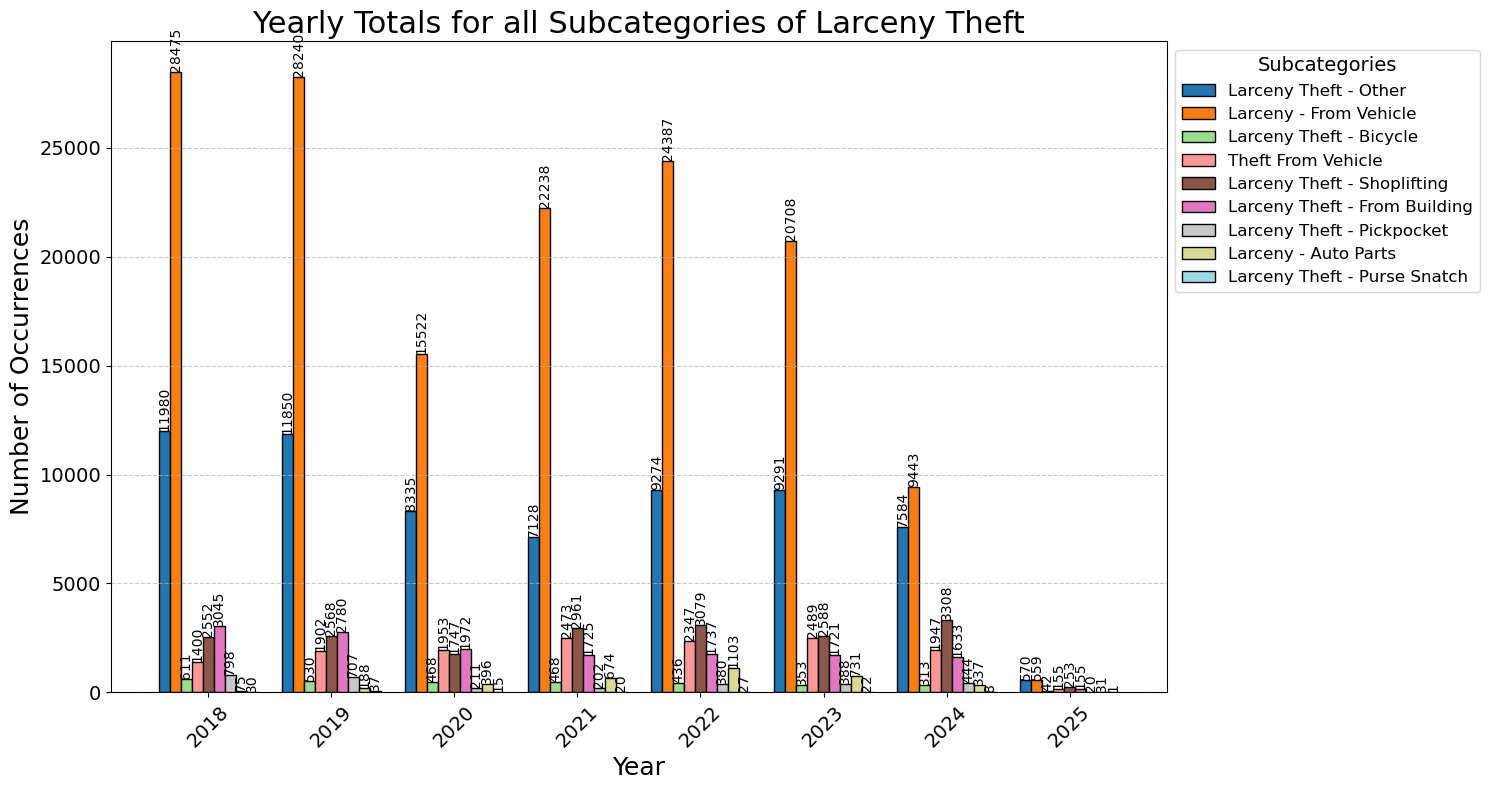

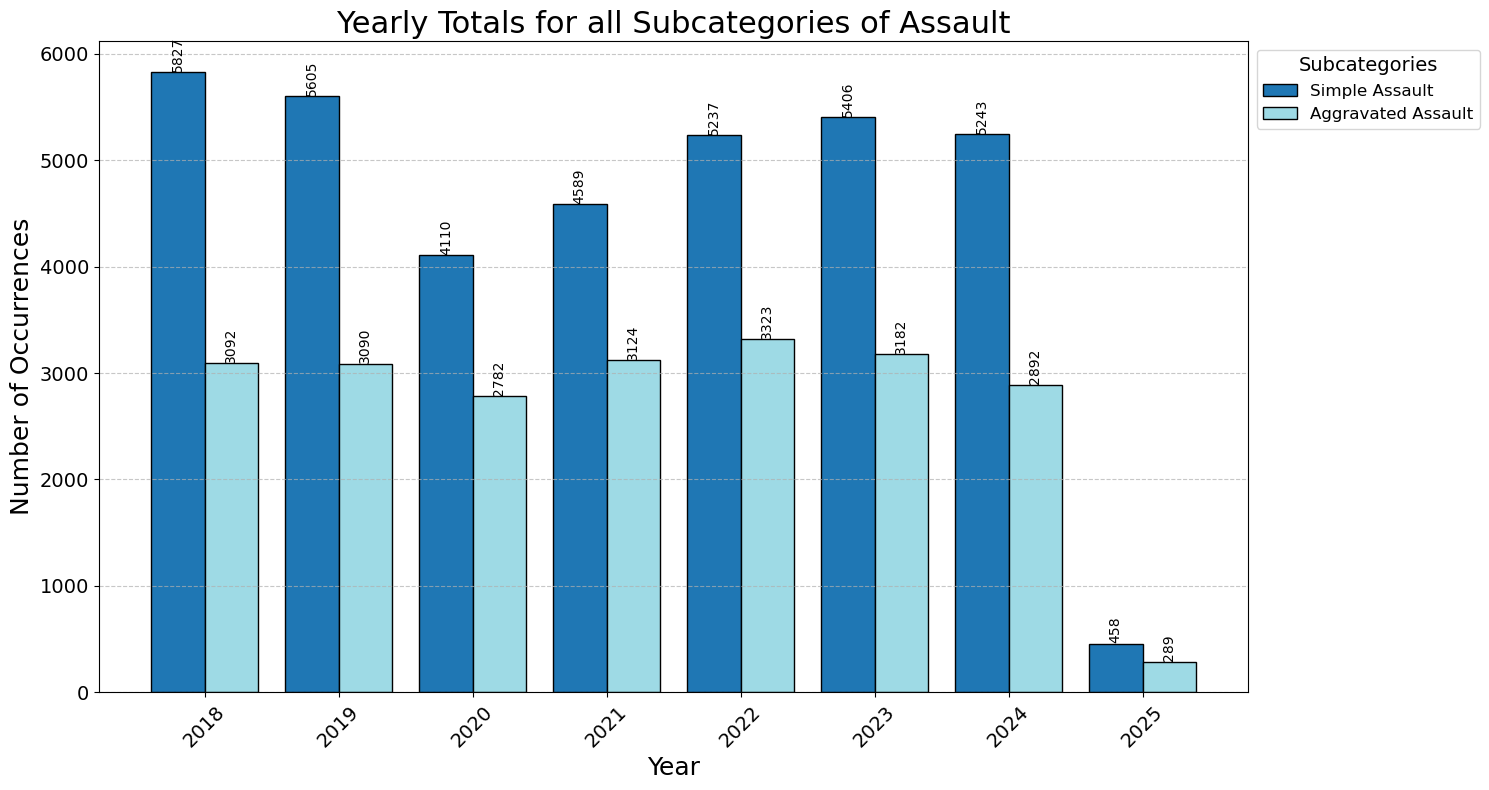

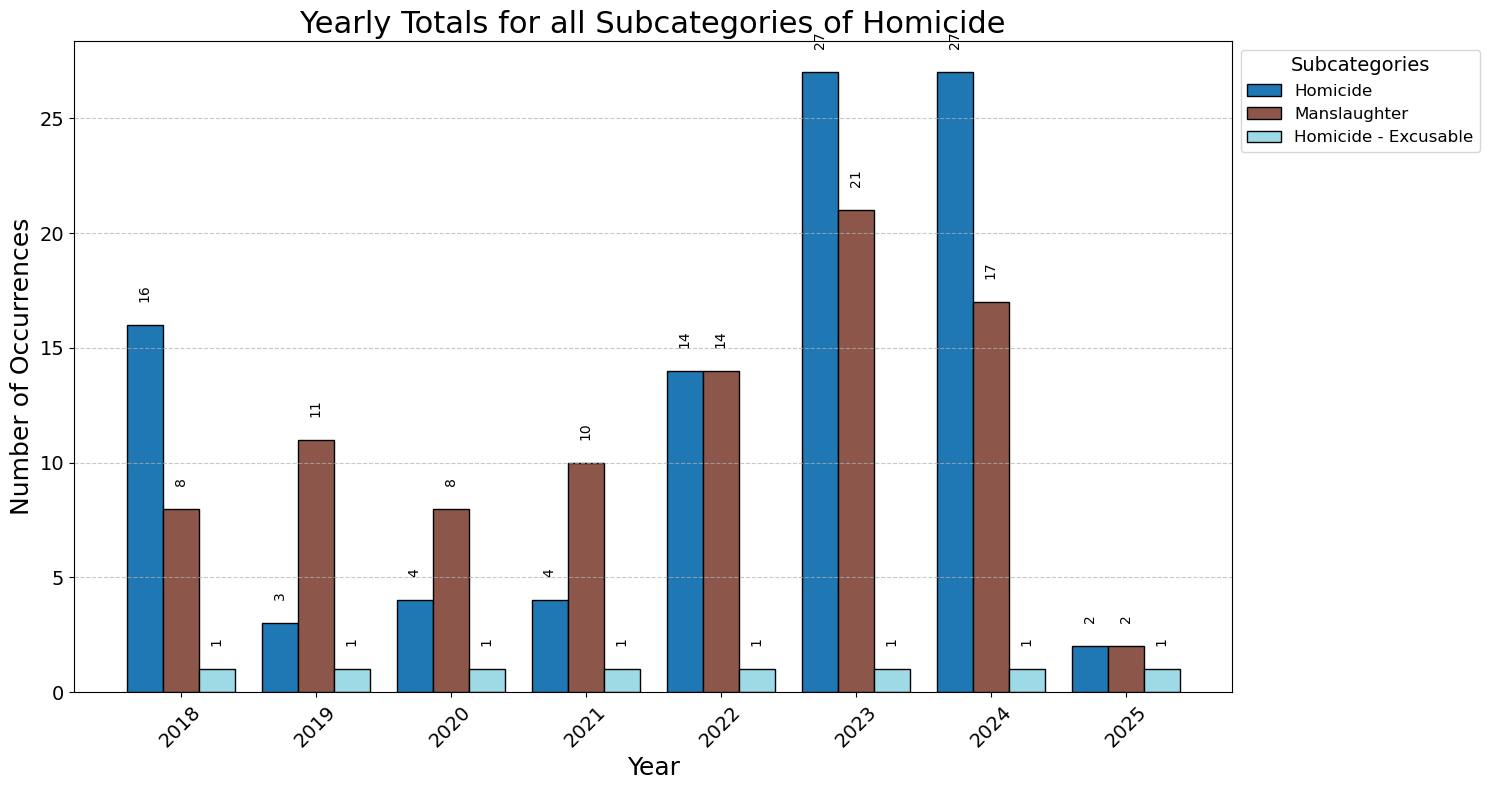

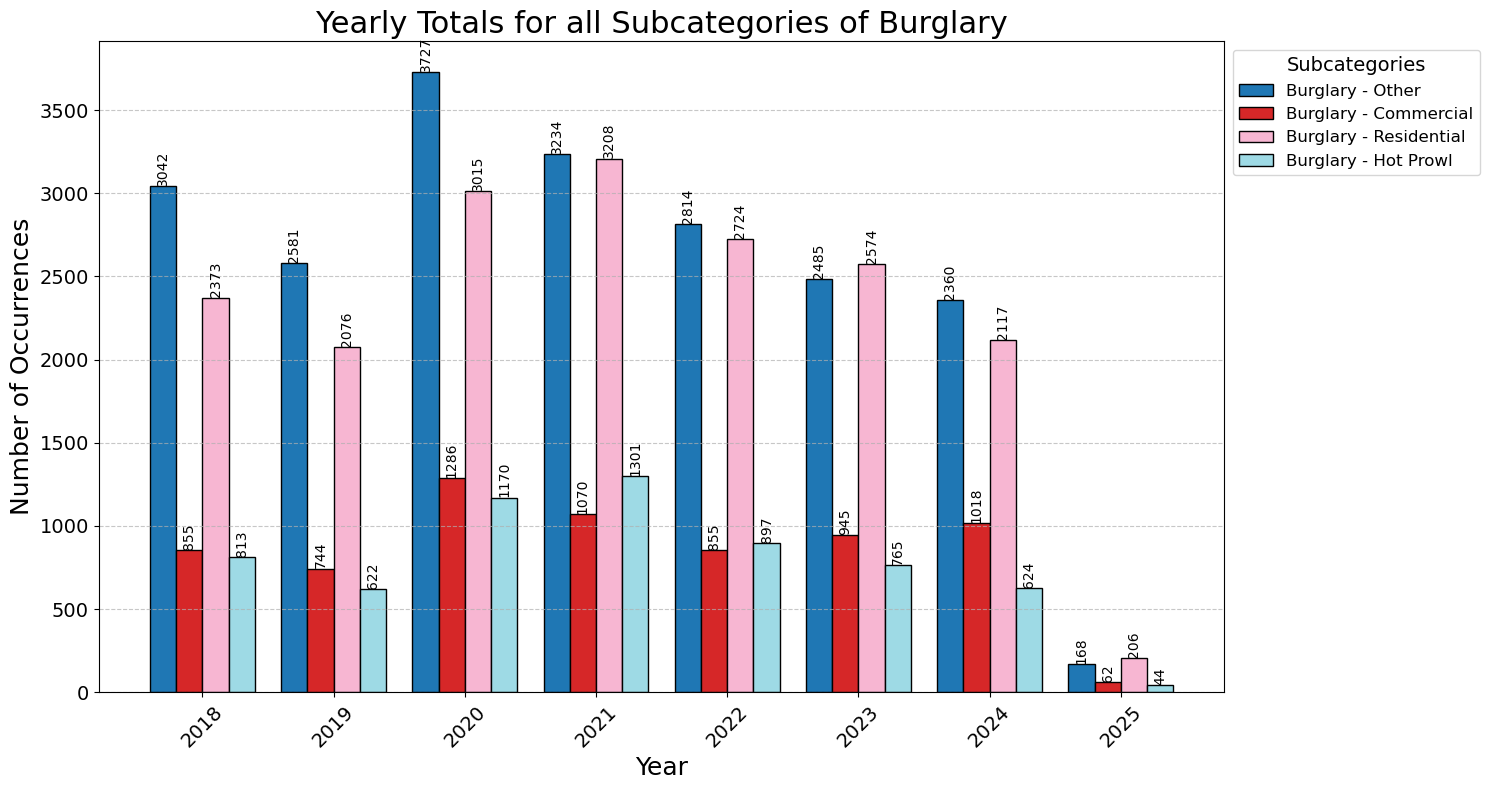

In [73]:
analyzeCrimeSubcategories(filePath, crimeType="Larceny Theft")
analyzeCrimeSubcategories(filePath, crimeType="Assault")
analyzeCrimeSubcategories(filePath, crimeType="Homicide")
analyzeCrimeSubcategories(filePath, crimeType="Burglary")

---
### `visualizeCrimeData(filePath, crimeType, subCrimeType=None, year=None)`
<div style=margin:20px>
    
#### Description
This function visualizes crime data over time for a specified crime type. It can also generate additional plots for a subcrime type if provided. The function dynamically adjusts its behavior based on whether a specific year is supplied or the entire dataset is analyzed. It highlights significant events, such as the Covid lockdown and the top 3 crime occurrence dates, and applies a rolling average and polynomial fit for trend analysis.

#### Parameters
- `filePath` (str): Path to the CSV file containing the crime data.
- `crimeType` (str): The specific category of crime to analyze.
- `subCrimeType` (str, optional): A subcategory of the crime type for additional analysis.
- `year` (int) **optional**: A specific year to filter the data. If not provided, the entire dataset is used.

#### Key Features
1. **Year Filtering**:
   - Filters the dataset by the specified year, if provided.
   - Defaults to analyzing all years if no year is specified.

2. **Rolling Average**:
   - Applies a rolling average to smooth data trends.
   - Uses a 7-day window if a specific year is analyzed; otherwise, uses a 30-day window.

3. **Polynomial Fit**:
   - Fits a 5th-degree polynomial for specific years or a 12th-degree polynomial for the entire dataset to model trends.

4. **Highlighting Notable Events**:
   - Adds a vertical line for the Covid lockdown (March 17, 2020) if relevant.
   - Labels the top 3 crime occurrence dates with their values.

5. **Subcrime Analysis**:
   - Generates additional plots for a specified subcrime type with the same features and visualizations.

6. **Polished Visualization**:
   - Includes dynamic titles, legends, axis labels, and gridlines.
   - Differentiates crime trends with color coding for clarity.
</div>

#### Example Usage
```python
# Visualize data for a specific crime type across all years
visualizeCrimeData(filePath, crimeType="Assault")

# Visualize data for a specific crime type in 2020
visualizeCrimeData(filePath, crimeType="Assault", year=2020)

# Visualize data for a crime type and its subcrime type in 2020
visualizeCrimeData(filePath, crimeType="Larceny Theft", subCrimeType="Larceny - From Vehicle", year=2020)


In [75]:
def visualizeCrimeData(filePath, crimeType, subCrimeType=None, year=None):
    import pandas as pd
    import matplotlib.pyplot as plt
    import matplotlib.dates as dt
    import numpy as np

    # Read data and filter
    data = pd.read_csv(filePath)
    data['Incident Date'] = pd.to_datetime(data['Incident Date'])  # Ensure dates are in datetime format
    filteredData = data[data['Incident Category'] == crimeType]
    
    # Determine Year, Polynomial Degree, and Moving Average Window
    if year:
        filteredData = filteredData[filteredData['Incident Date'].dt.year == year]
        yearLabel = f"{year}"
        polynomialDegree = 5  
        movingAverageWindow = 7  
    else:
        yearLabel = "All Years"
        polynomialDegree = 12  
        movingAverageWindow = 30  

    # Group by date and count occurrences
    crimeByDate = filteredData.groupby('Incident Date').size()
    crimeByDateMA = crimeByDate.rolling(window=movingAverageWindow, min_periods=1).mean()

    # === PLOT 1: Raw Crime Data with Notable Points ===
    fig, ax = plt.subplots(figsize=(20, 8))
    fig.patch.set_facecolor('lightgray')
    ax.set_facecolor('#e0e0e0')
    crimeByDate.plot(kind='line', linewidth=2, ax=ax, label="Crime Occurrences")
    crimeByDateMA.plot(kind='line', linewidth=4, ax=ax, label=f"{movingAverageWindow}-Day Moving Average", color='navy')

    # Polynomial Fit
    if len(crimeByDate) >= (polynomialDegree + 1):  
        xValues = np.arange(len(crimeByDate))
        coefficients = np.polyfit(xValues, crimeByDate.values, polynomialDegree)
        polyFit = np.poly1d(coefficients)
        plt.plot(crimeByDate.index, polyFit(xValues), color='purple', linestyle='-', linewidth=3, 
                 label=f'{polynomialDegree}th Degree Polynomial Fit')

    # Highlight Covid Lockdown (if applicable)
    if (not year) or (year == 2020):
        covidLockdownDate = pd.Timestamp('2020-03-17')
        if covidLockdownDate in crimeByDate.index:
            if year is None:
                xOffset = dt.date2num(covidLockdownDate) - 25
            else:
                xOffset = dt.date2num(covidLockdownDate) - 4
            plt.axvline(covidLockdownDate, color='black', linestyle='--', linewidth=3, alpha=0.5, label='Covid Lockdown')
            plt.text(xOffset, crimeByDate.min(), '03/17/2020', fontsize=12, ha='right', va='center_baseline', color='black')

    # Highlight the Top 3 Crime Occurrence Dates
    if len(crimeByDate) >= 3:
        topDates = crimeByDate.nlargest(3)
        colors = ['red', 'green', 'blue']
        labels = ['Max', 'Second Highest', 'Third Highest']

        for i, (date, value) in enumerate(zip(topDates.index, topDates.values)):
            plt.scatter(date, value, color=colors[i], s=200, label=f'{labels[i]} | {value} occurrences')
            if year is None:
                xOffset = dt.date2num(date) + 25
            else:
                xOffset = dt.date2num(date) + 4
            plt.text(xOffset, value, f'{date.date()} ', color=colors[i], fontsize=12, ha='left', va='center_baseline')

    plt.title(f"{movingAverageWindow}-Day Moving Avg & {polynomialDegree}th Deg Poly Fit: {crimeType} (For {yearLabel})", size=20)
    plt.xlabel("Date", size=18)
    plt.ylabel("Number of Occurrences", size=18)
    plt.xticks(size=18)
    plt.yticks(size=18)
    plt.grid(True, linewidth=1.5)
    plt.legend(fontsize=12)
    plt.show()

    # === Additional Plots for Subcrime (If Specified) ===
    if subCrimeType:
        subFilteredData = filteredData[filteredData['Incident Subcategory'] == subCrimeType]
        subCrimeByDate = subFilteredData.groupby('Incident Date').size()

        if not subCrimeByDate.empty:  # Ensure there's data to plot
            subCrimeByDateMA = subCrimeByDate.rolling(window=movingAverageWindow, min_periods=1).mean()

            # === PLOT 1 for Subcrime: Raw Data with Covid & Top 3 Points ===
            fig, ax = plt.subplots(figsize=(20, 8))
            fig.patch.set_facecolor('lightgray')
            ax.set_facecolor('#e0e0e0')
            subCrimeByDate.plot(kind='line', linewidth=2, ax=ax, label=f"{subCrimeType} Occurrences")
            subCrimeByDateMA.plot(kind='line', linewidth=4, ax=ax, label=f"{movingAverageWindow}-Day Moving Average", color='navy')

            # Polynomial Fit for Subcrime
            if len(subCrimeByDate) >= (polynomialDegree + 1):  
                xValues = np.arange(len(subCrimeByDate))
                coefficients = np.polyfit(xValues, subCrimeByDate.values, polynomialDegree)
                polyFit = np.poly1d(coefficients)
                plt.plot(subCrimeByDate.index, polyFit(xValues), color='purple', linestyle='-', linewidth=3, 
                         label=f'{polynomialDegree}th Degree Polynomial Fit')

            # Highlight Covid Lockdown (if applicable)
            if (not year) or (year == 2020):
                covidLockdownDate = pd.Timestamp('2020-03-17')
                if covidLockdownDate in subCrimeByDate.index:
                    if year is None:
                        xOffset = dt.date2num(covidLockdownDate) - 20
                    else:
                        xOffset = dt.date2num(covidLockdownDate) - 4
                    plt.axvline(covidLockdownDate, color='black', linestyle='--', linewidth=3, alpha=0.5, label='Covid Lockdown')
                    plt.text(xOffset, subCrimeByDate.min(), '03/17/2020', fontsize=12, ha='right', va='center_baseline', color='black')

            # Highlight the Top 3 Subcrime Occurrence Dates
            if len(subCrimeByDate) >= 3:
                topDates = subCrimeByDate.nlargest(3)
                colors = ['red', 'green', 'blue']
                labels = ['Max', 'Second Highest', 'Third Highest']

                for i, (date, value) in enumerate(zip(topDates.index, topDates.values)):
                    plt.scatter(date, value, color=colors[i], s=200, label=f'{labels[i]} | {value} occurrences')
                    if year is None:
                        xOffset = dt.date2num(date) + 25
                    else:
                        xOffset = dt.date2num(date) + 4
                    plt.text(xOffset, value, f'{date.date()} ', color=colors[i], fontsize=12, ha='left', va='center_baseline')

            plt.title(f"{movingAverageWindow}-Day Moving Avg & {polynomialDegree}th Deg Poly Fit: {subCrimeType} (For {yearLabel})", size=20)
            plt.xlabel("Date", size=18)
            plt.ylabel("Number of Occurrences", size=18)
            plt.xticks(size=18)
            plt.yticks(size=18)
            plt.grid(True, linewidth=1.5)
            plt.legend(fontsize=12)
            plt.show()


### Example uses of `visualizeCrimeData`

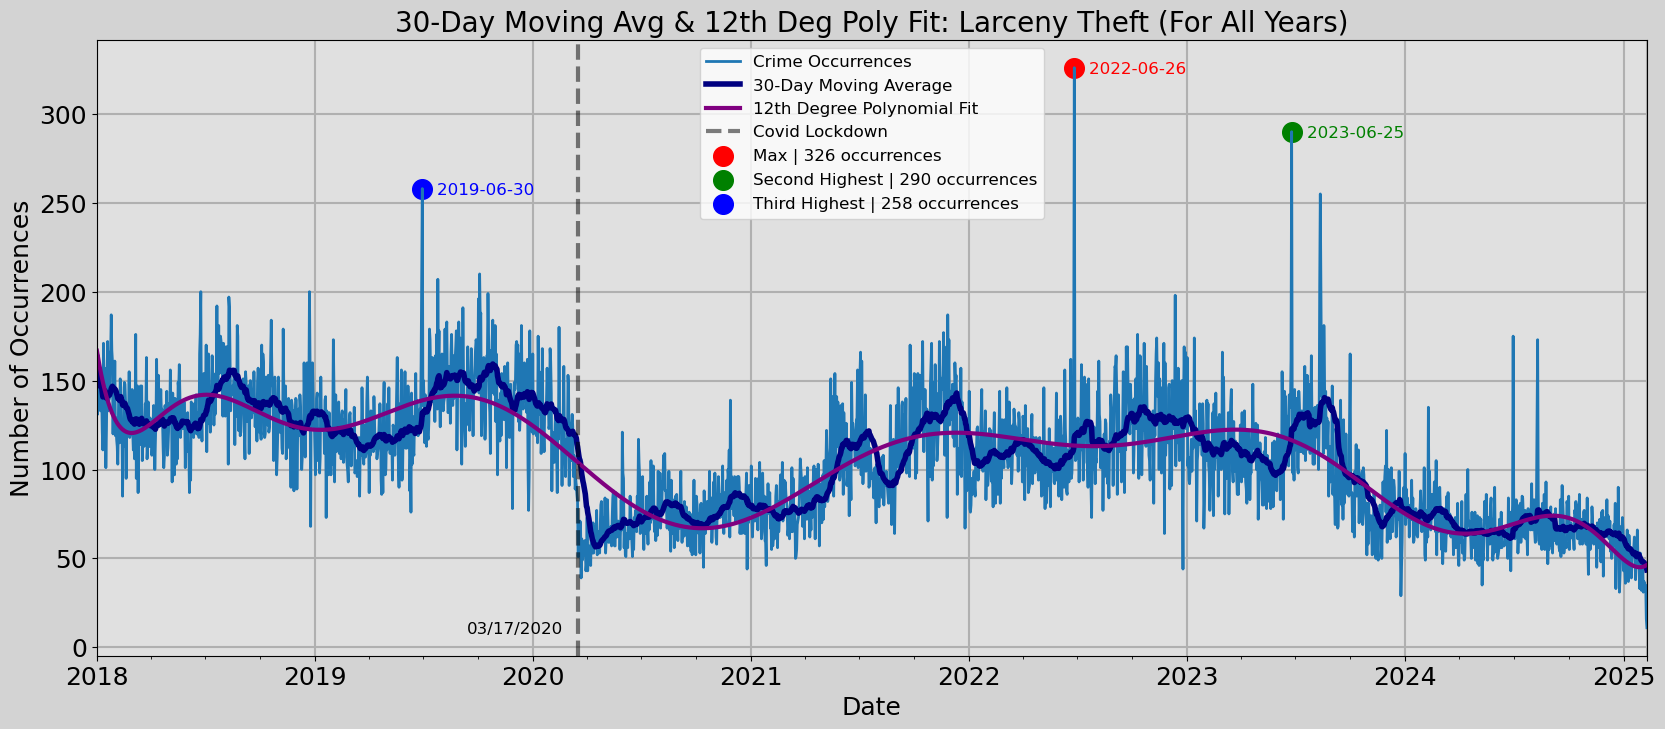

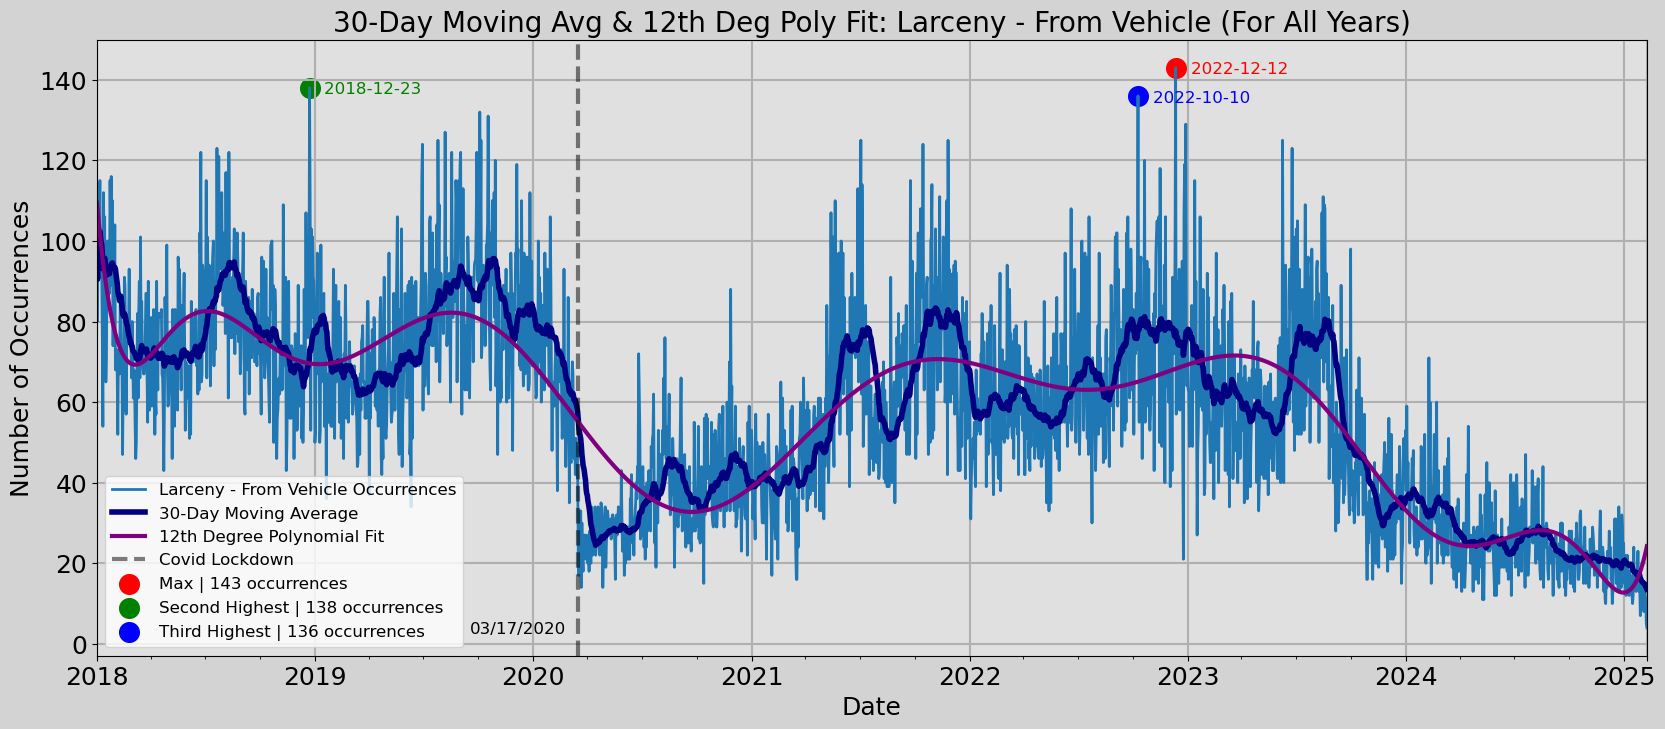

In [77]:
crimeType = 'Larceny Theft'
subCrime = 'Larceny - From Vehicle'
visualizeCrimeData(filePath, crimeType, subCrime)

## `plotMonthlySubcrimeTotals(filePath, crimeType, year=None)`

**Description**  
Generates a grouped bar chart comparing monthly totals of each subcategory for a specified crime type. Optionally filters to a single year if provided; otherwise uses all available years in the dataset.

**Arguments**  
- **filePath** *(str)*: Path to the CSV file containing crime data.  
- **crimeType** *(str)*: The primary crime category to focus on (e.g., "Larceny Theft").  
- **year** *(int, optional)*: Specific year to filter the data by. If omitted, plots data from all years.

**Behavior**  
1. Reads and processes CSV data, extracting year and month from the incident dates.  
2. Filters rows to include only the specified `crimeType`, and if `year` is provided, narrows to that year.  
3. Groups each subcategory by month, counting occurrences (replacing zeros with ones for visibility).  
4. Draws a grouped bar chart with months on the x-axis and subcategory counts as bars.  
5. Labels each bar with the integer count, sorts subcategories by total occurrences, and applies distinct colors for clarity.

**Output**  
Displays a Matplotlib figure comparing the monthly frequency of subcategories within the specified crime type.


In [79]:
def plotMonthlySubcrimeTotals(filePath, crimeType, year=None):
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib import colormaps

    # Read the CSV file
    data = pd.read_csv(filePath)
    # Convert the 'Incident Date' to datetime for easier extraction of month/year
    data['Incident Date'] = pd.to_datetime(data['Incident Date'])  # Ensure dates are in datetime format
     # Create 'Month' and 'Year' columns to facilitate grouping
    data['Month'] = data['Incident Date'].dt.month  # Extract the month
    data['Year'] = data['Incident Date'].dt.year  # Extract the year

    # Filter for the specified crime type
    filteredData = data[data['Incident Category'] == crimeType]

    # If a specific year is provided, filter the data further
    if year:
        filteredData = filteredData[filteredData['Year'] == year]

    if filteredData.empty:
        print(f"No data available for the crime type: {crimeType}")
        return

    # Identify all unique subcategories for the specified crime
    uniqueSubcrimes = filteredData['Incident Subcategory'].dropna().unique()

    # We'll collect the monthly totals for each subcrime in a list
    monthlyTotals = []
    months = range(1, 13)  # January to December

    # For each subcrime, group by 'Month' and count the occurrences
    for subcrime in uniqueSubcrimes:
        subcrimeData = filteredData[filteredData['Incident Subcategory'] == subcrime]
        monthlyCounts = subcrimeData.groupby('Month').size()
        # Reindex to ensure that each month from 1 to 12 is included
        # (months not in the data get filled with 0)
        monthlyTotals.append(monthlyCounts.reindex(months, fill_value=0))  # Ensure alignment with all months

    # Create a DataFrame for easier plotting
    subcrimeDf = pd.DataFrame(monthlyTotals, index=uniqueSubcrimes, columns=months).T

    # Set all values below 1 to 1
    subcrimeDf[subcrimeDf < 1] = 1
    
    # Sort subcrimes in descending order by total occurrences
    subcrimeDf = subcrimeDf.loc[:, subcrimeDf.sum(axis=0).sort_values(ascending=False).index]

    # Generate colors for each subcrime
    cmap = colormaps['tab20']  # Use the new colormap API
    colors = cmap(np.linspace(0, 1, len(subcrimeDf.columns)))

    # Plot the grouped bar chart
    fig, ax = plt.subplots(figsize=(15, 8))
    barWidth = 0.8 / len(subcrimeDf.columns)  # Adjust bar width based on the number of subcrimes
    positions = np.arange(len(months))  # Positions for each month group

    # Plot each subcrime's bars side by side for each month
    for i, subcrime in enumerate(subcrimeDf.columns):
        bars = ax.bar(
            positions + i * barWidth,
            subcrimeDf[subcrime],
            barWidth,
            label=subcrime,
            color=colors[i],
            edgecolor='black'
        )
        # Add labels for the totals
        for bar in bars:
            height = bar.get_height()
            if height > 0:  # Only label bars with non-zero height
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    height + 20,  # Slightly above the bar
                    f'{int(height)}',  # Label as integer
                    ha='center',
                    va='bottom',
                    rotation=90,  # Rotate for better fit
                    fontsize=10,
                    color='black'
                )

    # Formatting the plot
    yearLabel = f"Year: {year}" if year else "All Years"
    ax.set_title(f"Monthly Totals for Subcategories of {crimeType} ({yearLabel})", size=22)
    ax.set_xlabel("Month", size=18)
    ax.set_ylabel("Number of Occurrences", size=18)
    ax.set_xticks(positions + barWidth * (len(subcrimeDf.columns) - 1) / 2)
    ax.set_xticklabels(
        ['January', 'February', 'March', 'April', 'May', 'June', 
         'July', 'August', 'September', 'October', 'November', 'December'],
        rotation=45,
        fontsize=14
    )
    ax.legend(title="Subcategories", fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.yticks(fontsize=14)  # Increased font size for y-axis ticks
    plt.tight_layout()
    plt.show()


Table Of Crimes and Subcategories:
| Unique Incident Categories                   | Unique Incident Subcategories            |
|:---------------------------------------------|:-----------------------------------------|
| Arson                                        | Aggravated Assault                       |
| Assault                                      | Arrest                                   |
| Burglary                                     | Arson                                    |
| Case Closure                                 | Bad Checks                               |
| Civil Sidewalks                              | Bribery                                  |
| Courtesy Report                              | Burglary - Commercial                    |
| Disorderly Conduct                           | Burglary - Hot Prowl                     |
| Drug Offense                                 | Burglary - Other                         |
| Drug Violation                             

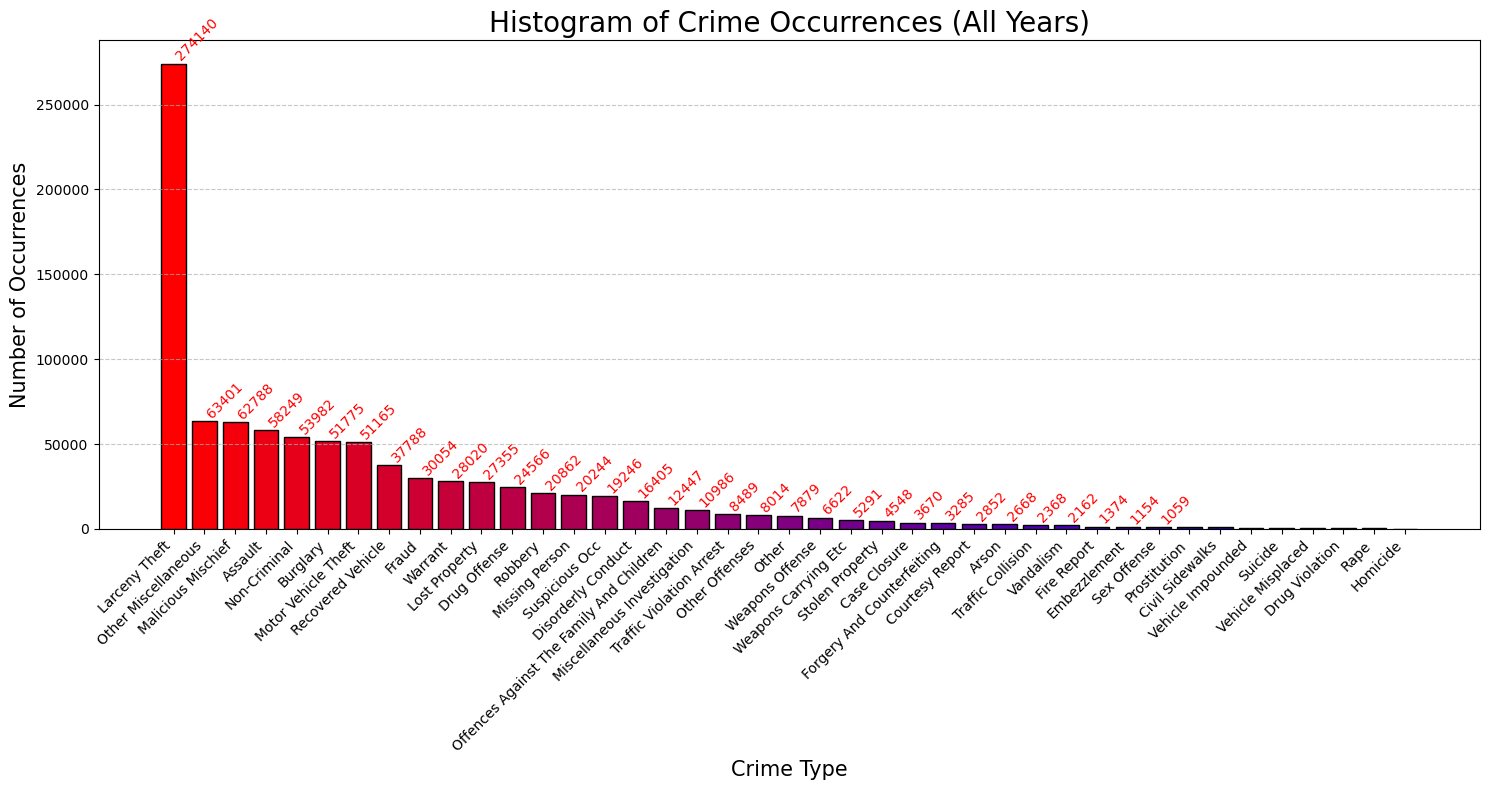

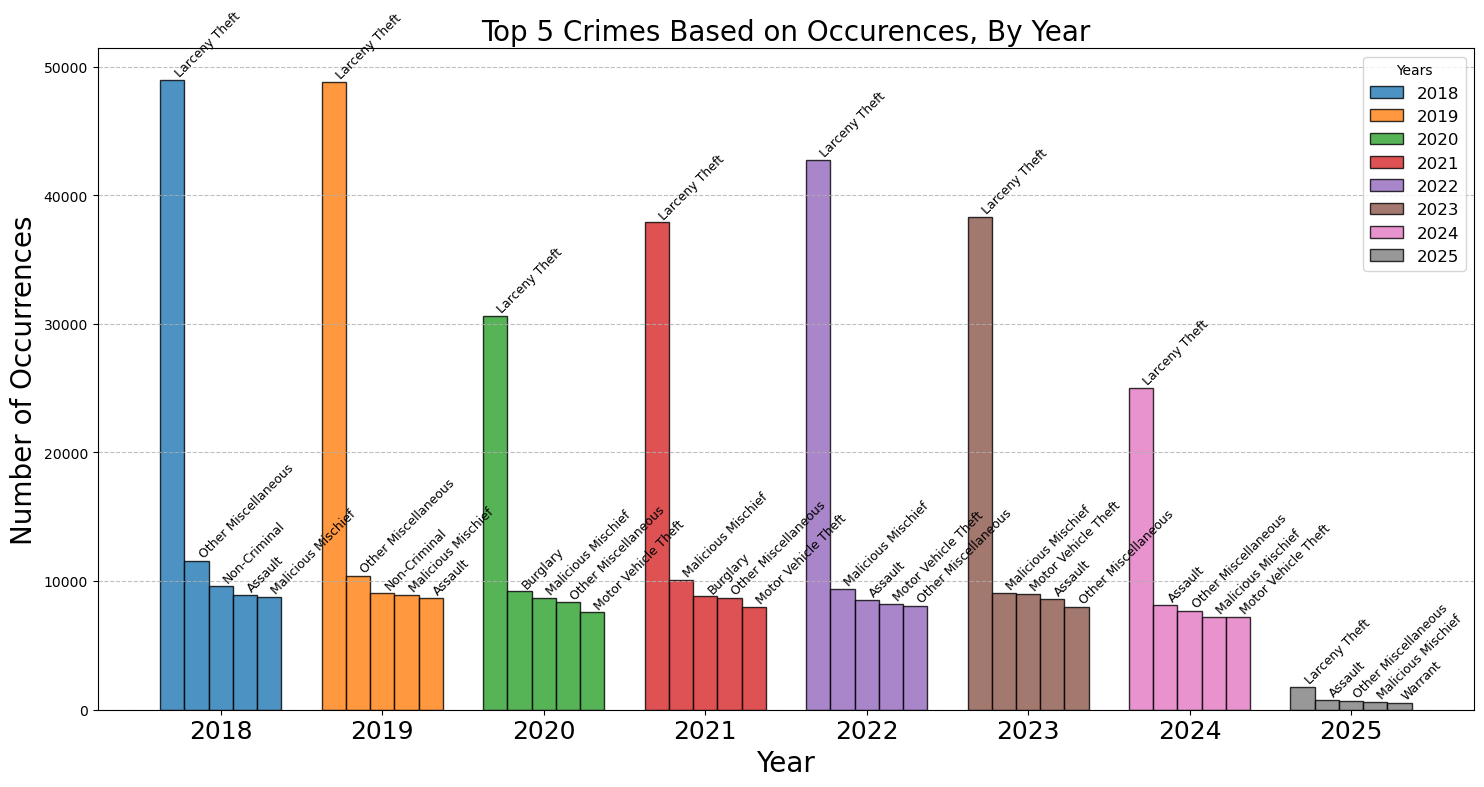

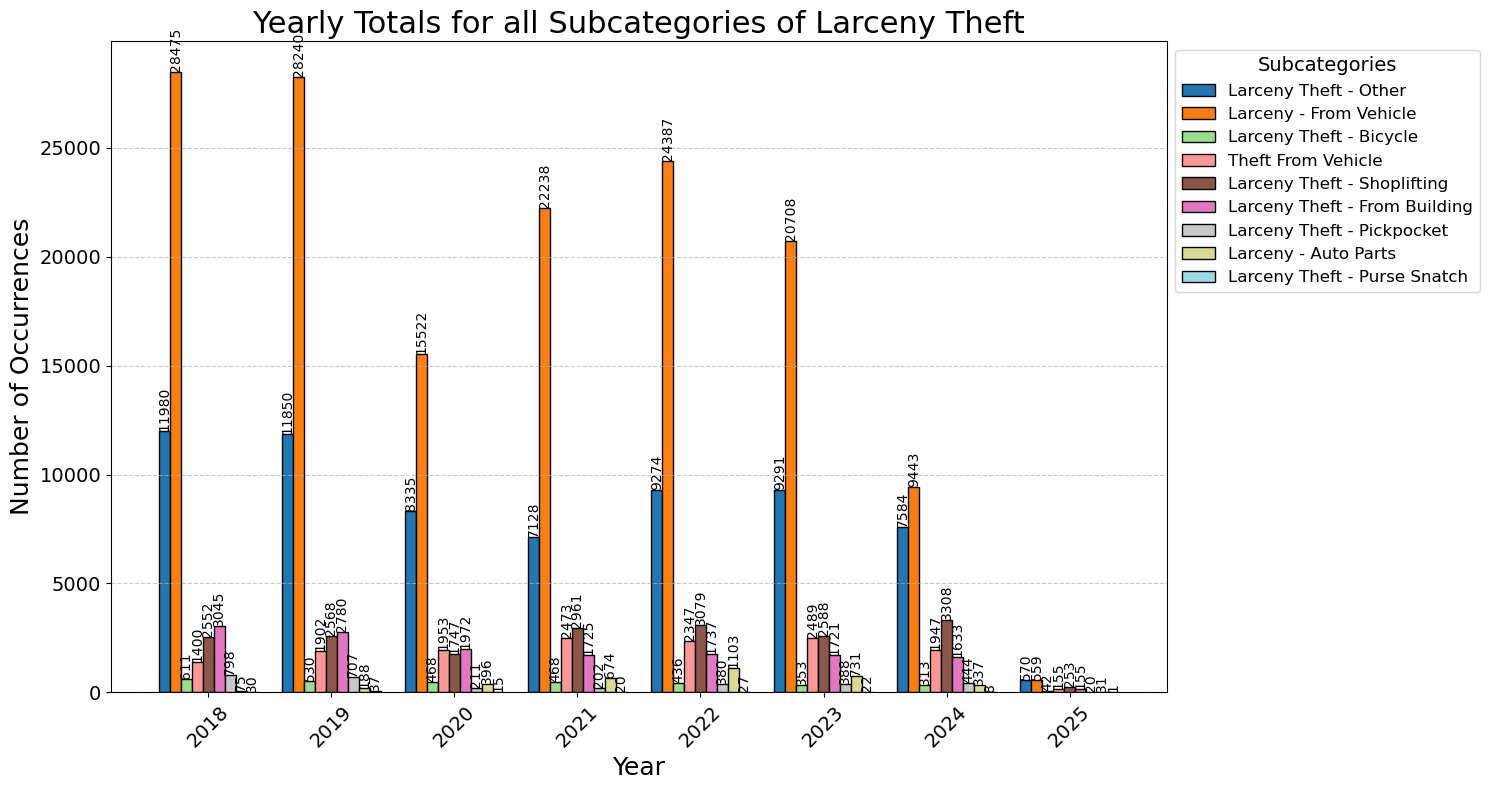

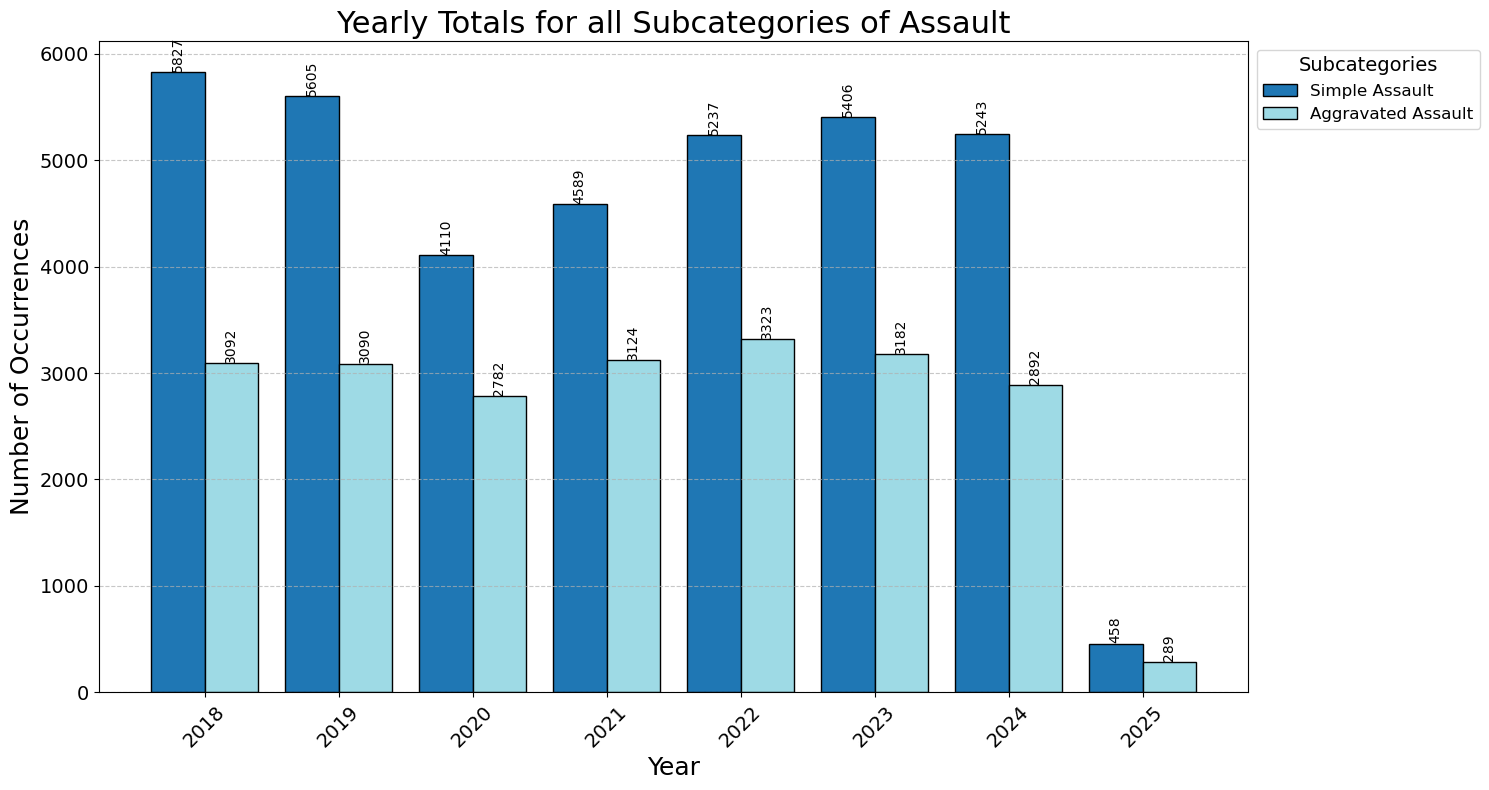

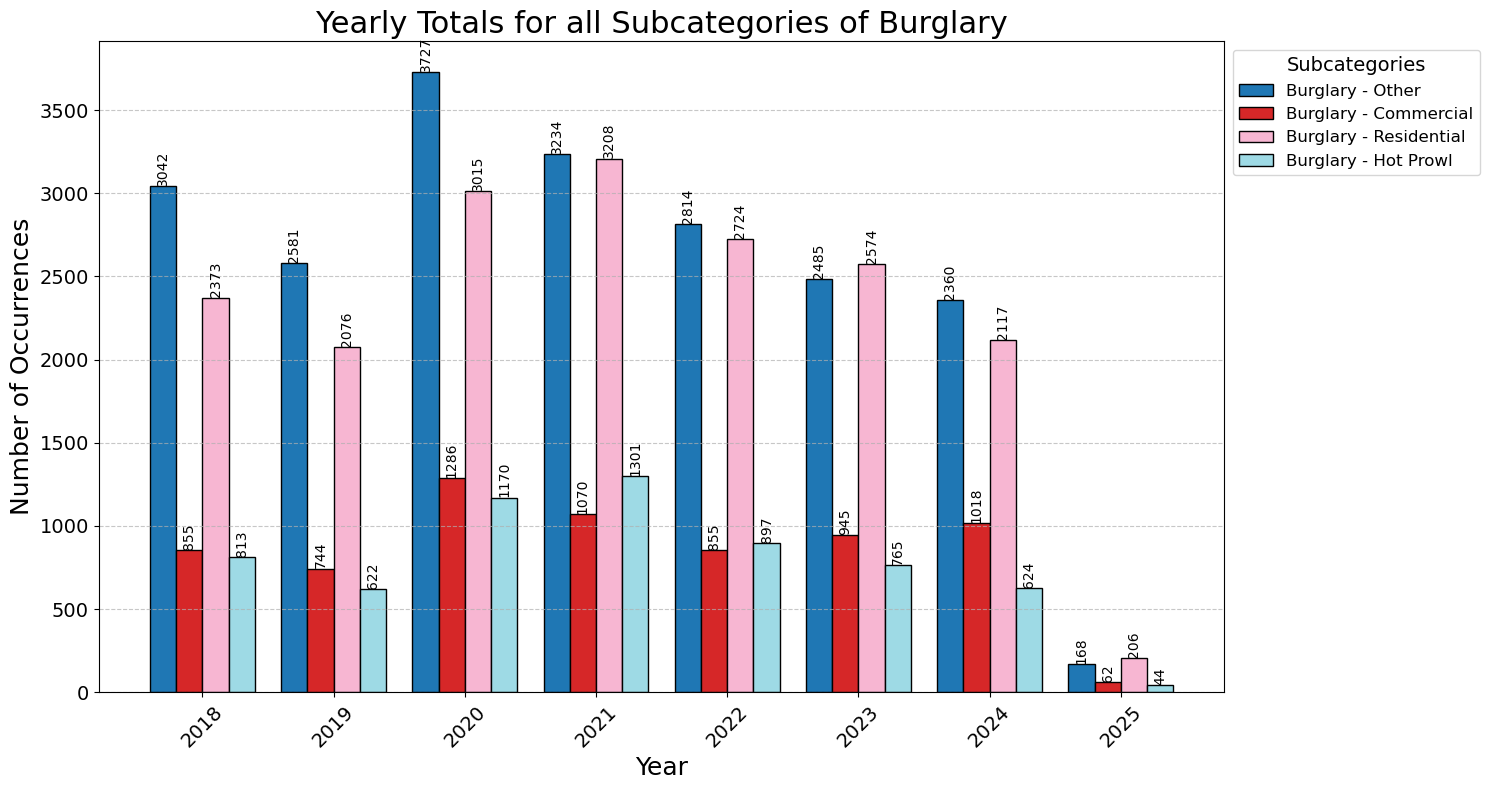

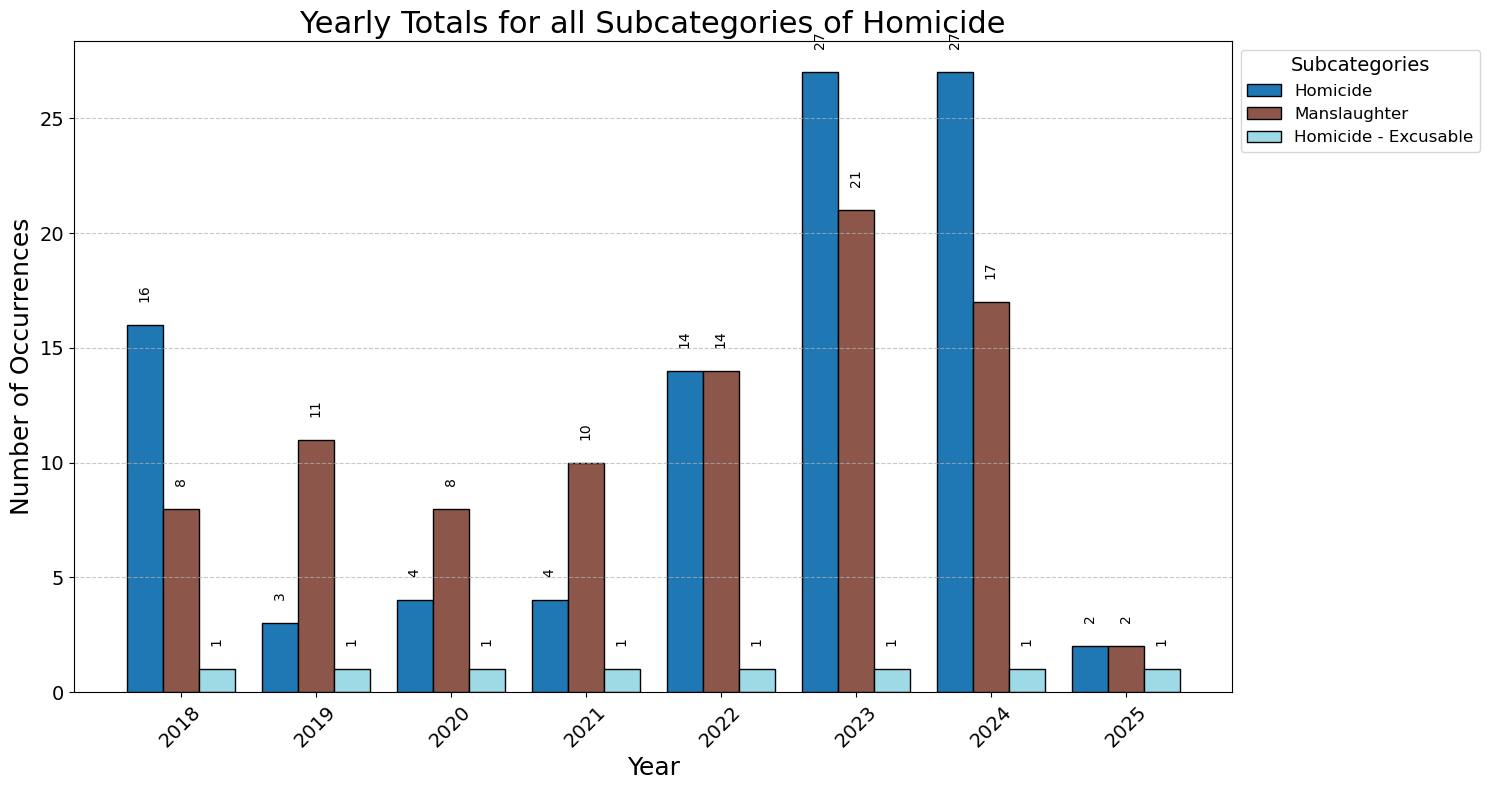

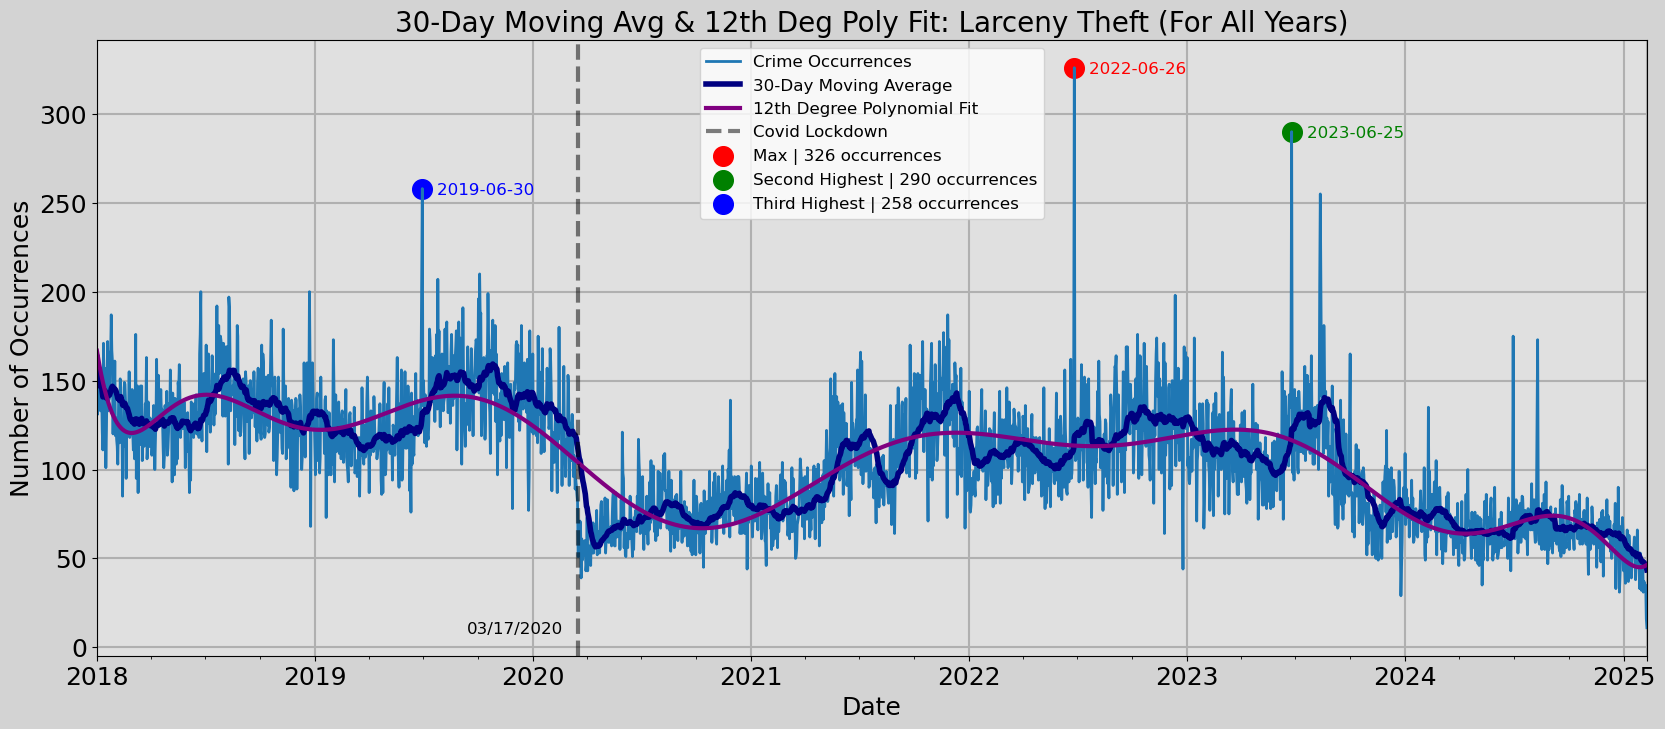

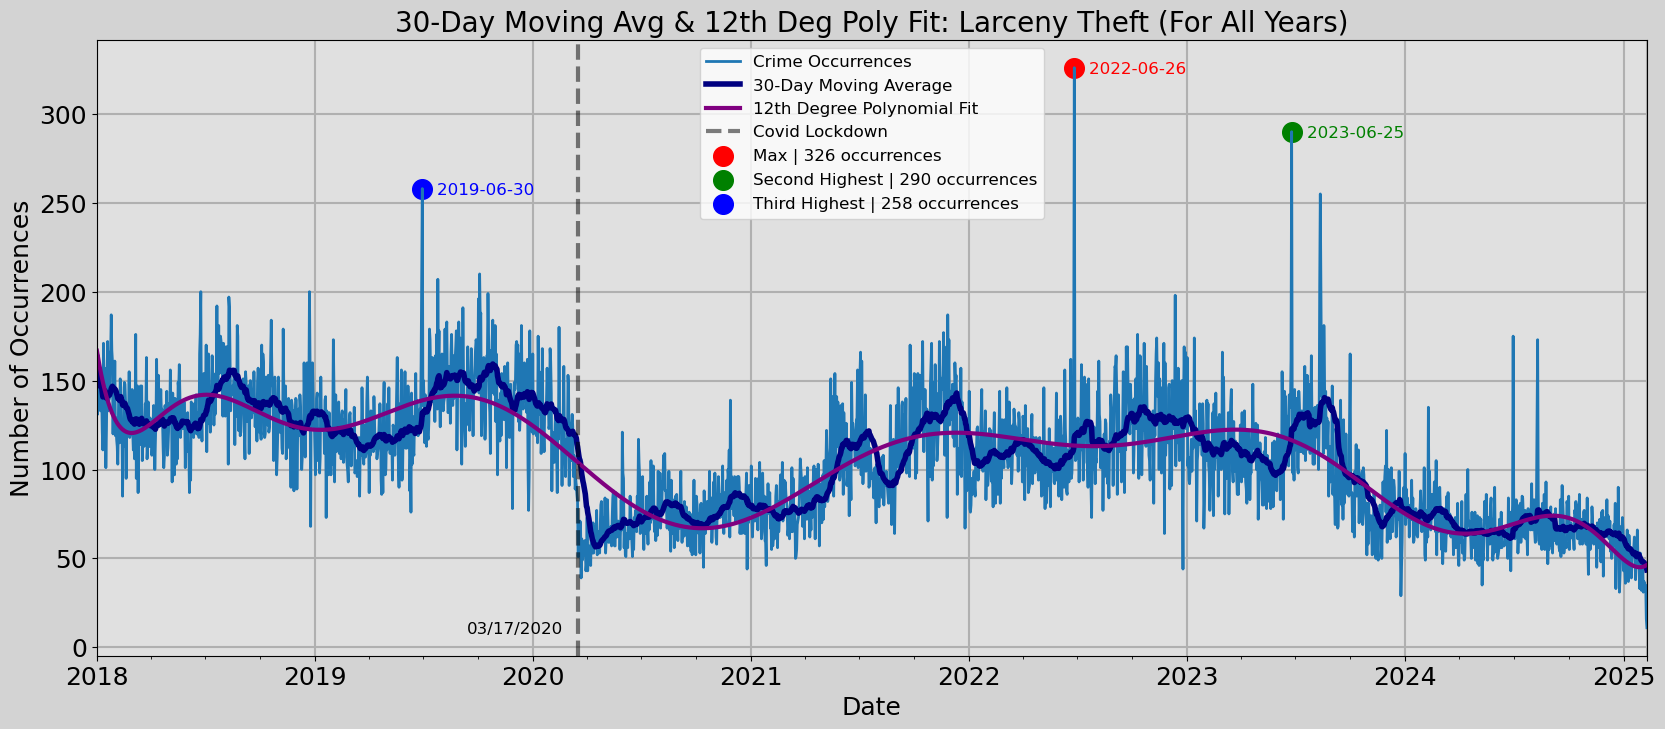

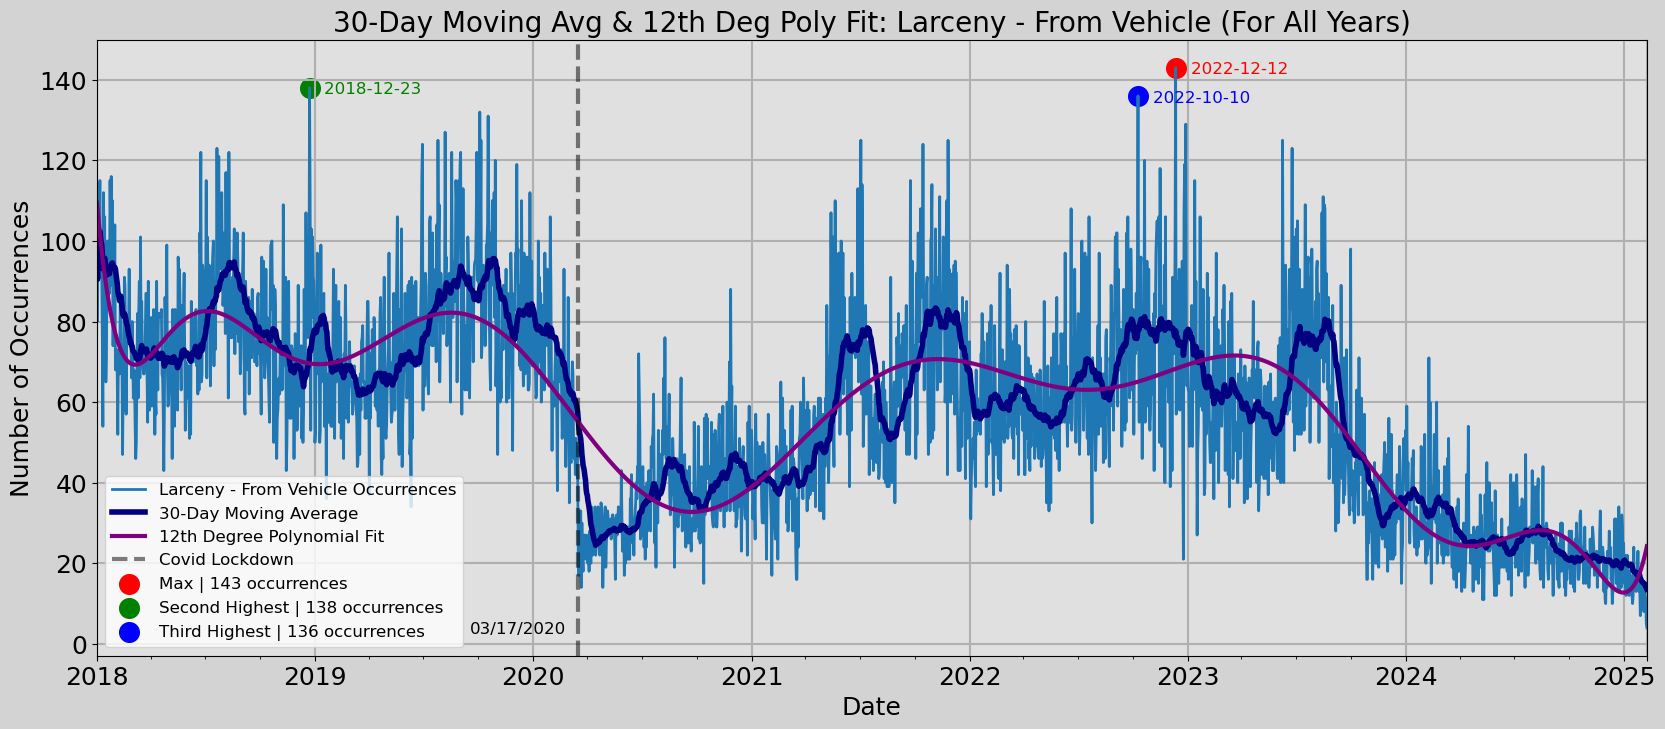

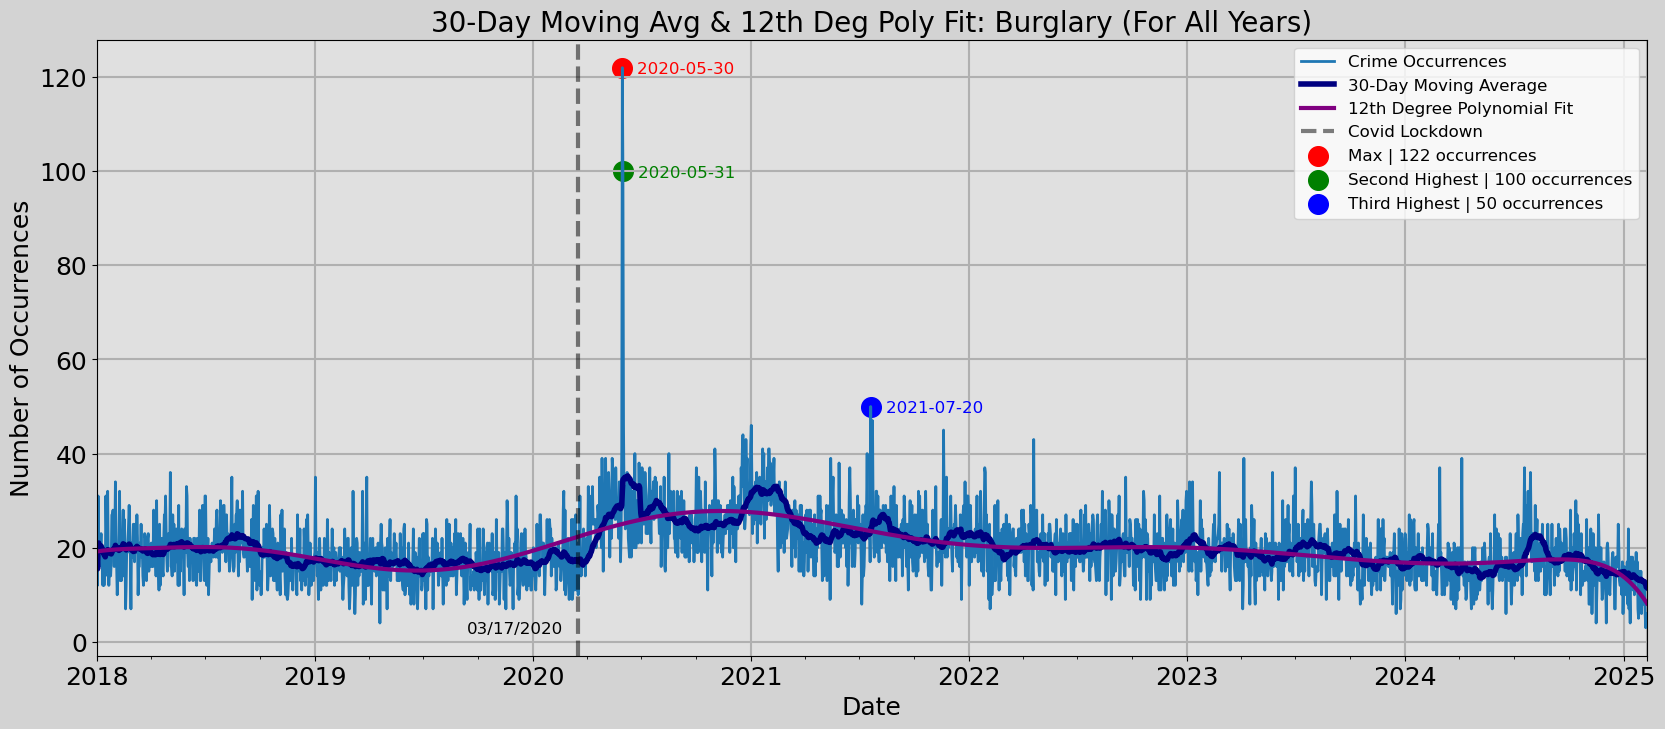

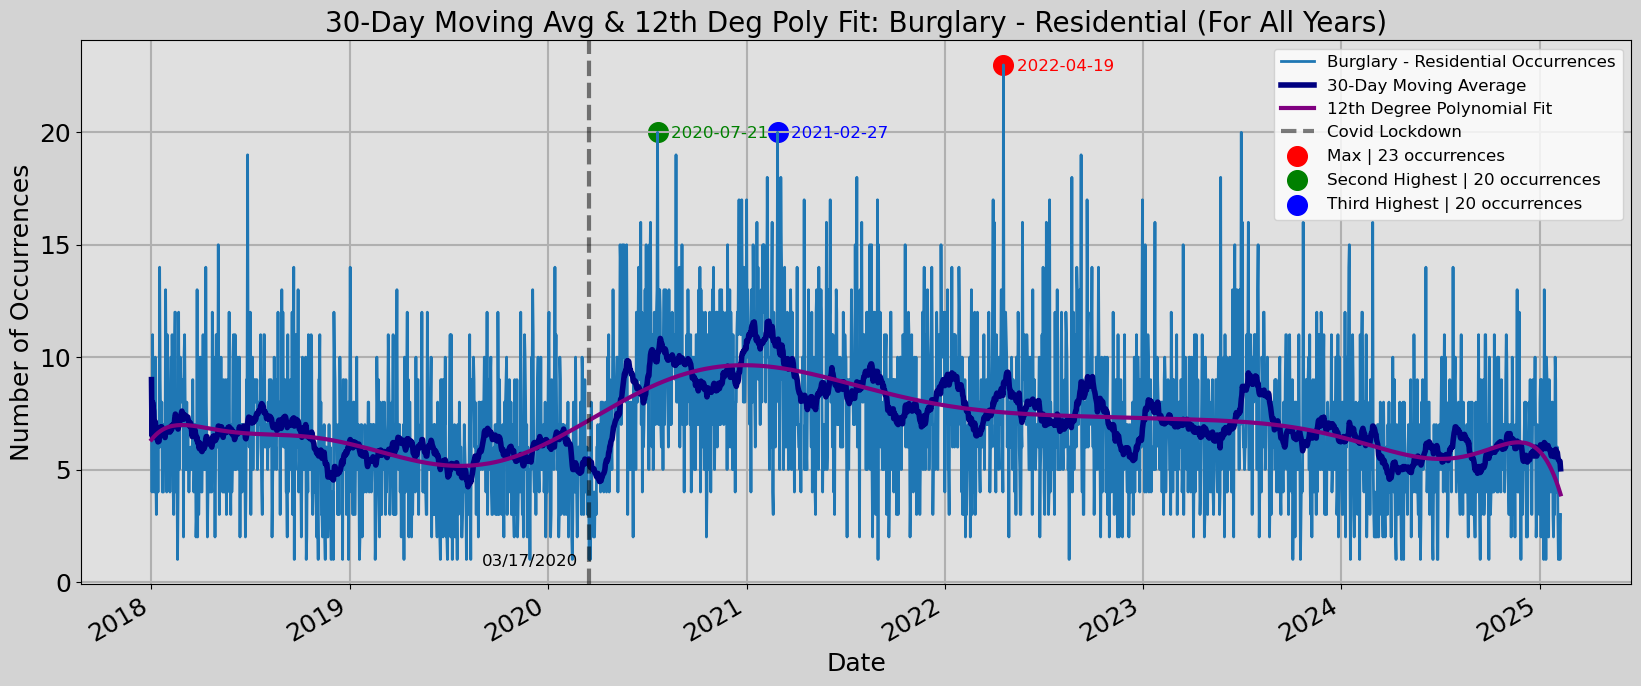

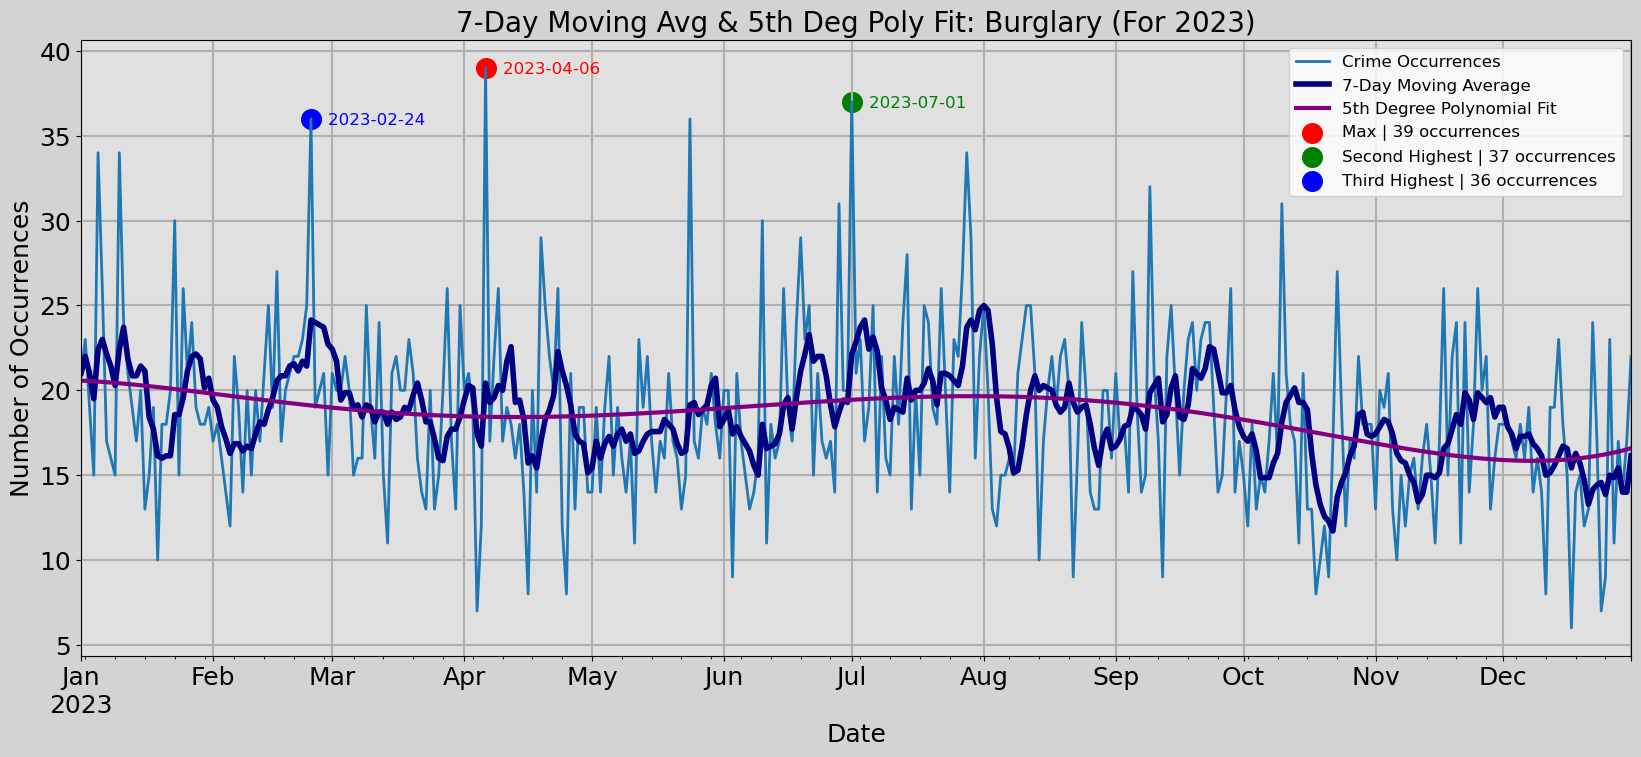

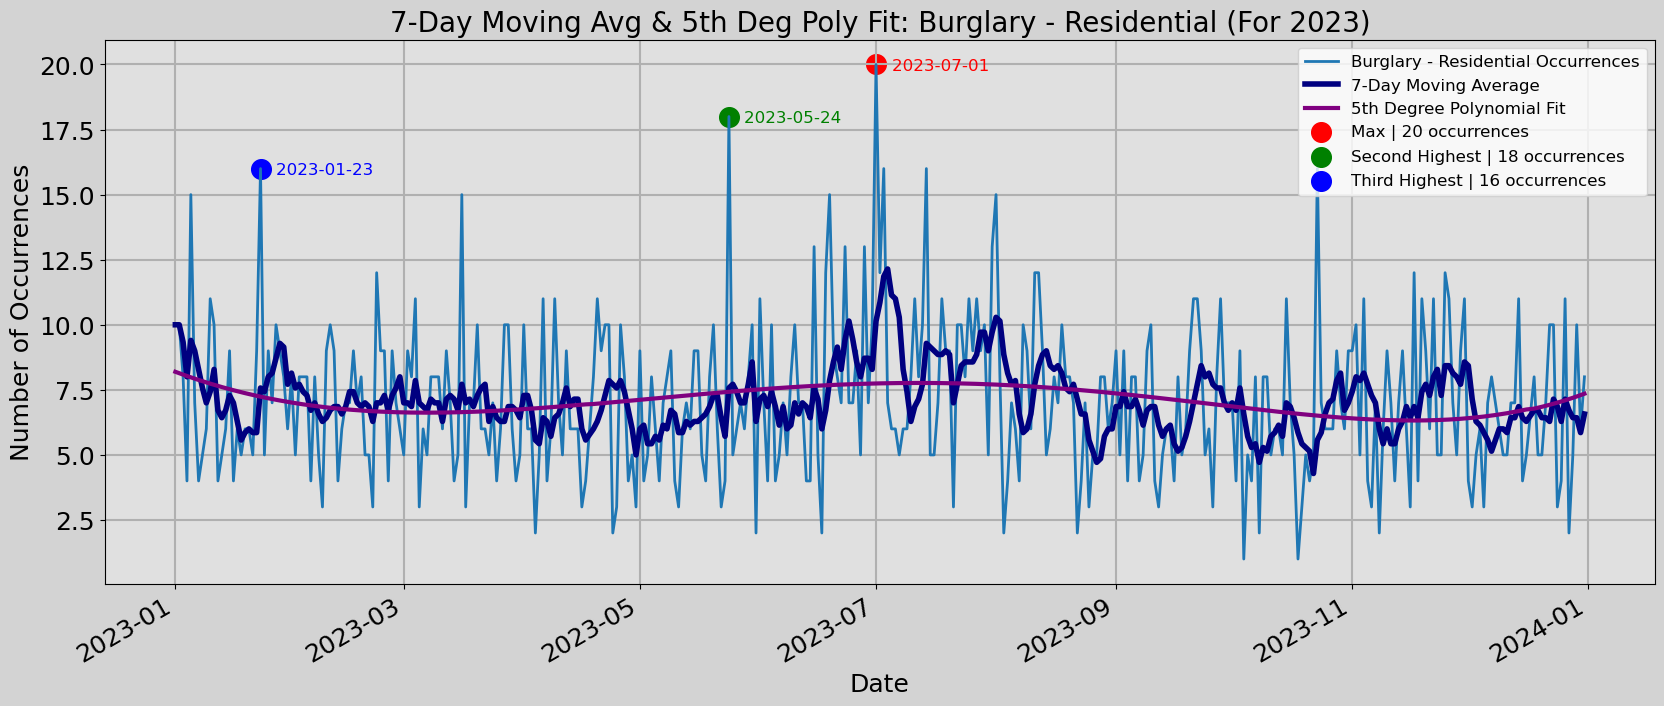

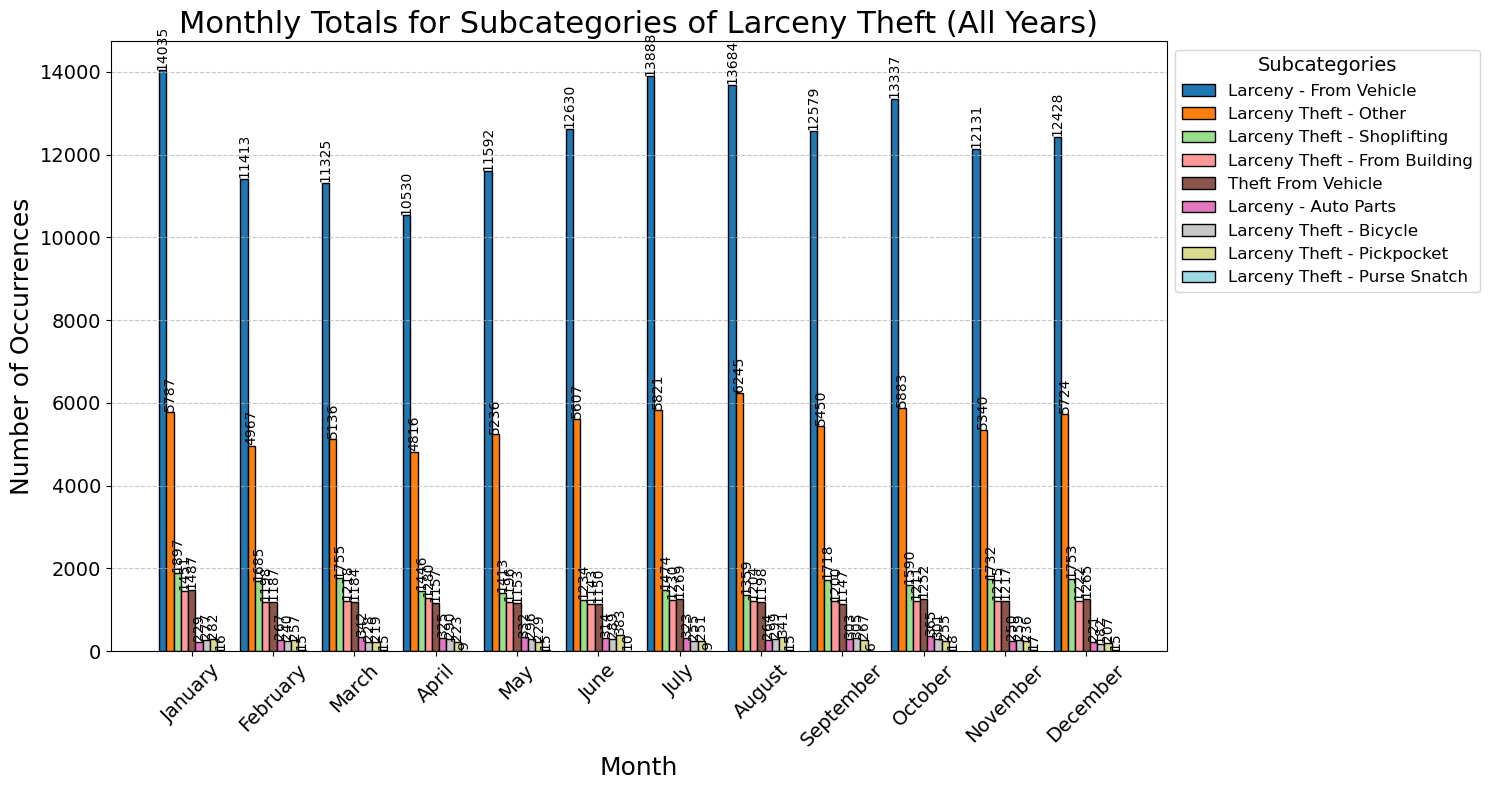

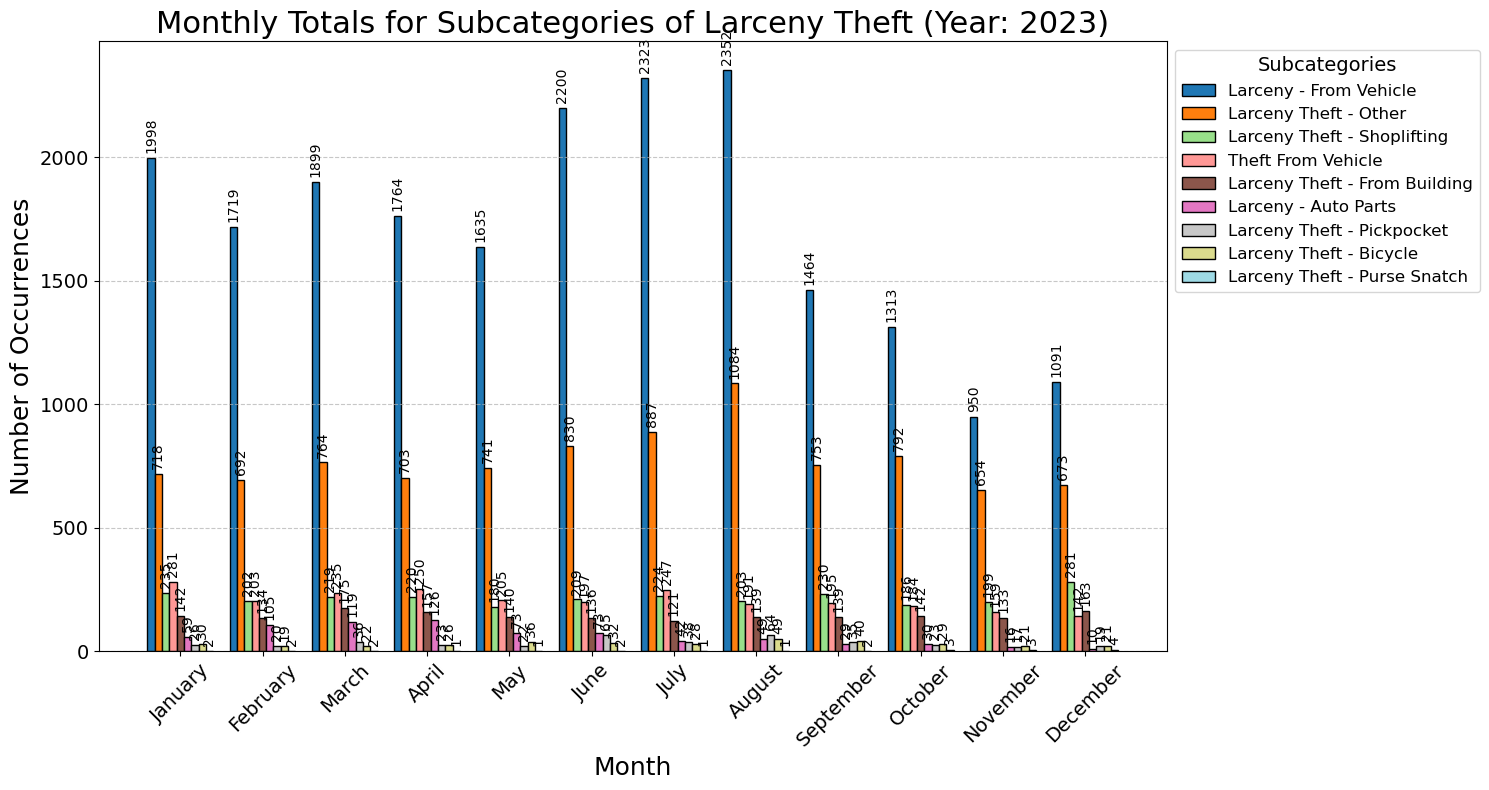

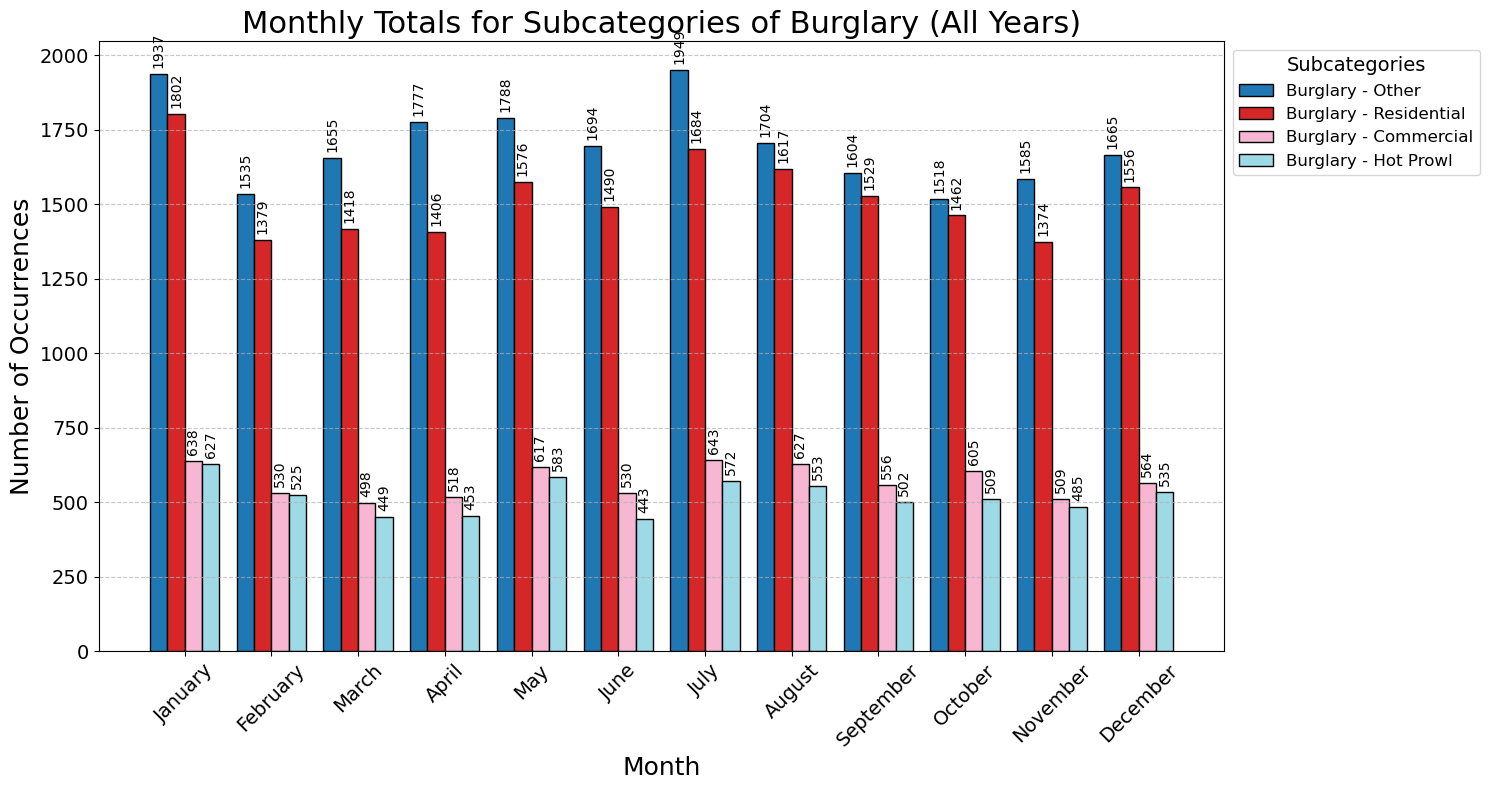

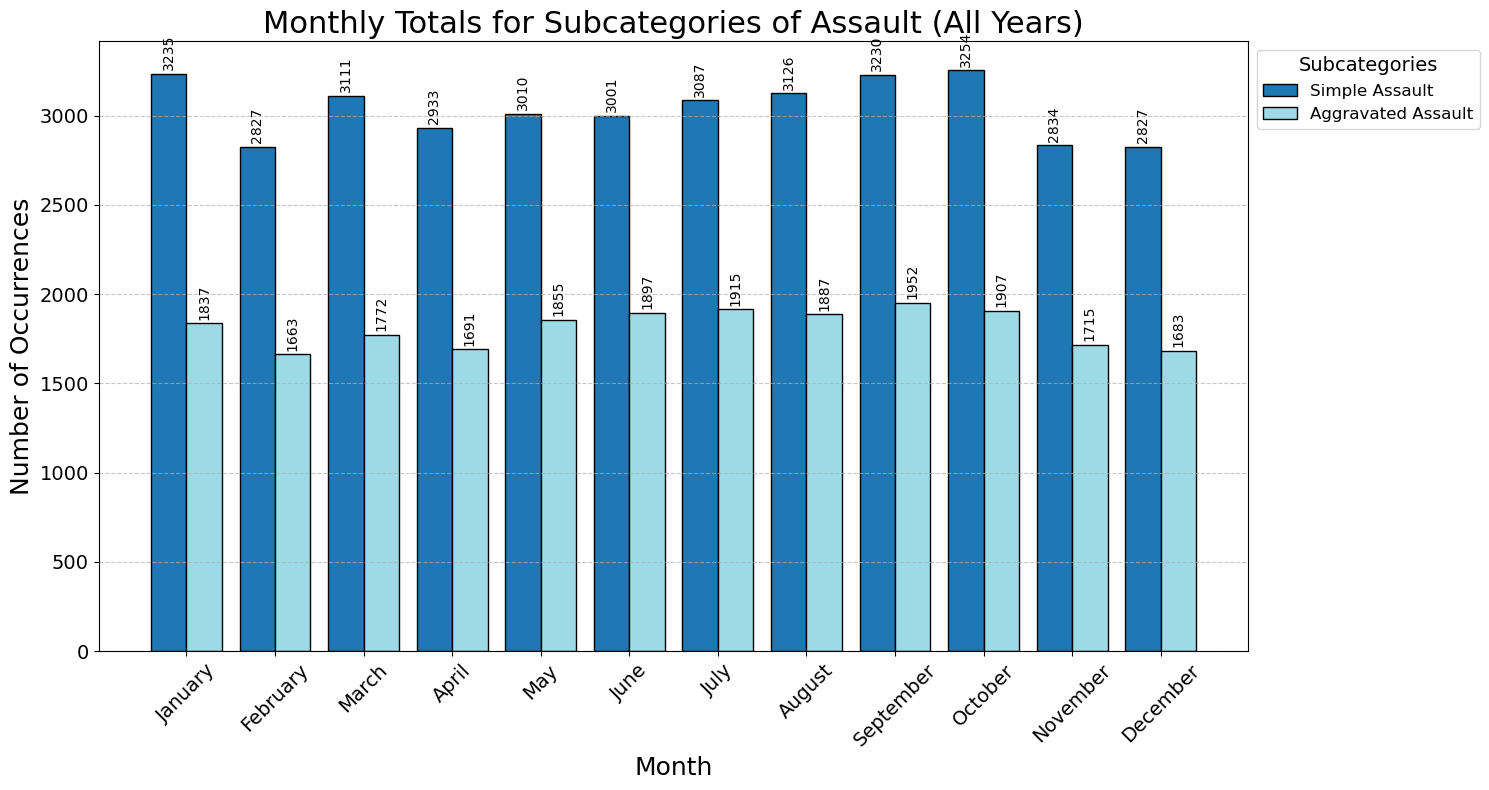

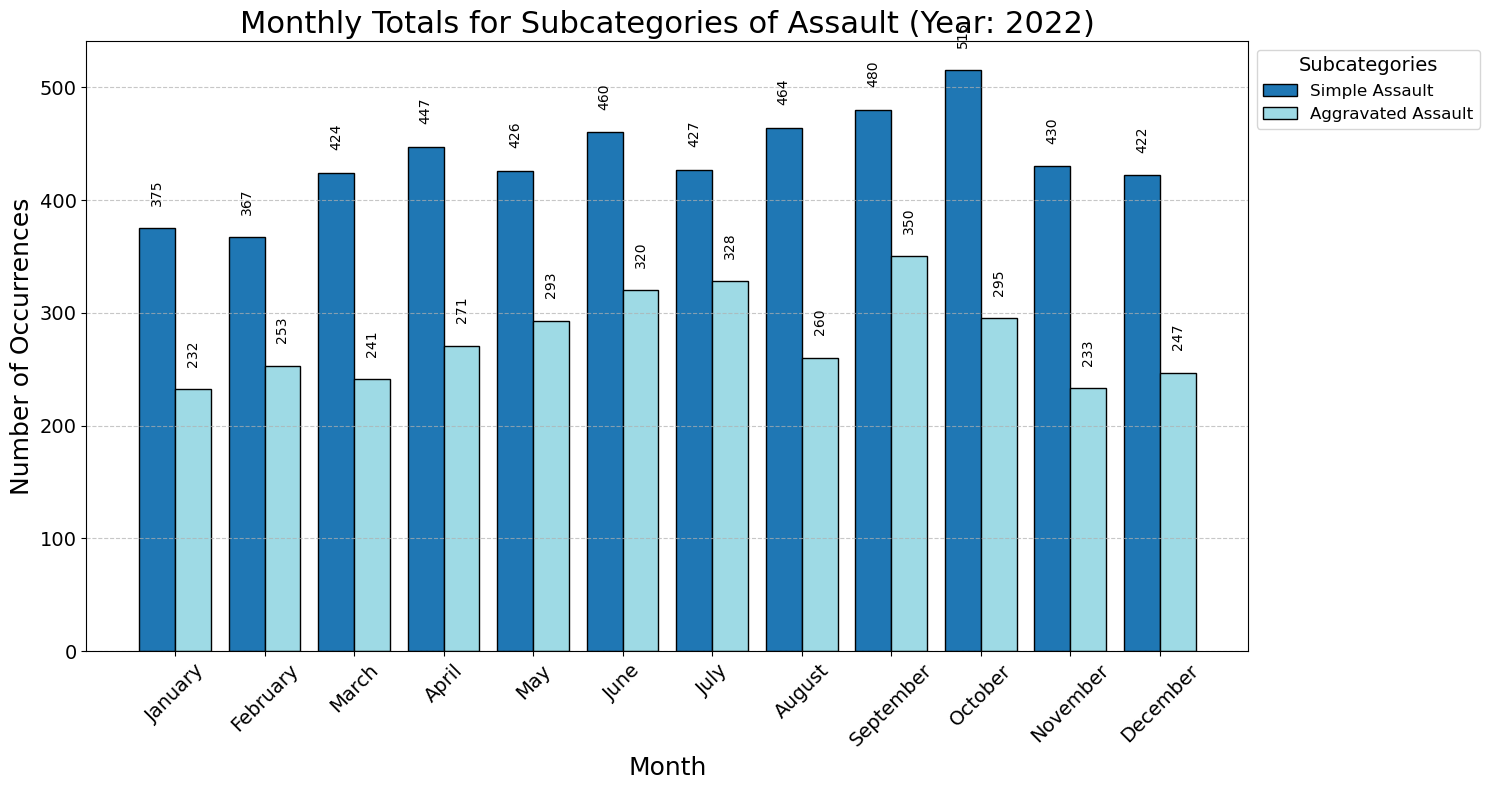

In [95]:
filePath = "/Users/matt/Documents/MT Data Projects/SF data/Police_Department_Incident_Reports__2018_to_Present_20250210.csv"

# Table Of Contents
listUniqueItemsAsTable(filePath)

# Totals Histogram
plotCrimeHistogram(filePath)
#plotCrimeHistogram(filePath,2023)

# Comparative Crime Bar Chart
comparativeCrimeBarChart(filePath)

# Comparative Bar Chart for Subcategories
analyzeCrimeSubcategories(filePath, crimeType="Larceny Theft")
analyzeCrimeSubcategories(filePath, crimeType="Assault")
analyzeCrimeSubcategories(filePath, 'Burglary')
analyzeCrimeSubcategories(filePath, crimeType="Homicide")

# Visualizing Crimes
crimeType = 'Larceny Theft'
subCrime = 'Larceny - From Vehicle'
visualizeCrimeData(filePath, crimeType)
visualizeCrimeData(filePath, crimeType, subCrime)
crimeType = 'Burglary'
subCrime = 'Burglary - Residential'
visualizeCrimeData(filePath, crimeType, subCrime)
visualizeCrimeData(filePath, crimeType, subCrime, year = 2023)

# Monthly total breakdown of crimes and subcrimes
# Analyze subcrimes for a specific crime type (e.g., "Homicide") for all years
plotMonthlySubcrimeTotals(filePath, crimeType="Larceny Theft")
plotMonthlySubcrimeTotals(filePath, crimeType="Larceny Theft", year=2023)
# Analyze subcrimes for a specific crime type for the year 2022
plotMonthlySubcrimeTotals(filePath, crimeType="Burglary")
plotMonthlySubcrimeTotals(filePath, crimeType="Assault")
plotMonthlySubcrimeTotals(filePath, crimeType="Assault", year = 2022)

Note that 2022 september was the middle of a heat wave in San Francisco from august to september